In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [51]:
uploaded = files.upload()

Saving sql (17).csv to sql (17) (1).csv


In [52]:
filename = next(iter(uploaded))

In [53]:
df = pd.read_csv(filename, sep=';', encoding='utf-8')
df.head(10)

,puskesmas,pasien,age,gender,faskes,city,regency,kelurahan,type_tb,date_start,...,sarana_pembuangan_sampah,sampah,membuka_jendela_kamar_tidur,membuka_jendela_ruang_keluarga,membersihkan_rumah,membuang_tinja,membuang_sampah,kebiasaan_ctps,memiliki_hewan_ternak,kandang_hewan
0,Puskesmas Kedungmundu,51881,2.0,L,RS Bhayangkara Polda,Semarang,Tembalang,Tandang,NaN,2024-09-21,...,"Ada, tetapi tidak kedap air dan tidak tertutup",Lainnya (Sungai),NaN,Tidak pernah dibuka,Tidak pernah dibersihkan,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,NaN
1,Puskesmas Kedungmundu,51907,44.0,L,kedungmundu,Semarang,Tembalang,Tandang,NaN,2024-09-04,...,Tidak Ada,Lainnya (Sungai),NaN,NaN,Tidak pernah dibersihkan,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,NaN
2,Puskesmas Kedungmundu,51856,72.0,L,RS Roemani Muhammadiyah Semarang,Semarang,Tembalang,Tandang,NaN,2024-09-04,...,"Ada, tetapi tidak kedap air dan tidak tertutup",Dikelola Sendiri (Pilah Sampah),Tidak pernah dibuka,Tidak pernah dibuka,Kadang-kadang,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,NaN
3,Puskesmas Sekaran,50496,NaN,P,RSUD K.R.M.T. Wongsonegoro Semarang,Semarang,Gunungpati,Sukorejo,NaN,2024-07-04,...,"Ada, kedap air dan tidak tertutup",Lainnya (Sungai),Tidak pernah dibuka,Tidak pernah dibuka,Kadang-kadang,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,NaN
4,Puskesmas Kedungmundu,52214,2.0,P,bangetayu,Semarang,Tembalang,Tandang,NaN,2024-10-15,...,"Ada, kedap air dan tidak tertutup",Lainnya (Sungai),Tidak pernah dibuka,Tidak pernah dibuka,Kadang-kadang,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,NaN
5,Puskesmas Kedungmundu,52340,43.0,P,RSUD K.R.M.T. Wongsonegoro Semarang,Semarang,Tembalang,Tandang,NaN,2024-10-10,...,Tidak Ada,Bakar,Tidak pernah dibuka,Tidak pernah dibuka,Kadang-kadang,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,NaN
6,Puskesmas Kedungmundu,52311,19.0,P,kedungmundu,Semarang,Tembalang,Tandang,NaN,2024-10-16,...,"Ada, kedap air dan tidak tertutup",Bakar,Tidak pernah dibuka,Tidak pernah dibuka,Kadang-kadang,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,NaN
7,Puskesmas Kedungmundu,54100,NaN,L,kedungmundu,Semarang,Tembalang,Sendangmulyo,NaN,2024-12-16,...,"Ada, kedap air dan tidak tertutup",Bakar,Tidak pernah dibuka,Kadang-kadang dibuka,Kadang-kadang,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,NaN
8,Puskesmas Kedungmundu,51944,11.0,L,RSUP Dr. Kariadi Semarang,Semarang,Tembalang,Sambiroto,NaN,2024-09-19,...,"Ada, tetapi tidak kedap air dan tidak tertutup",Lainnya (Sungai),NaN,NaN,Kadang-kadang,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,NaN
9,Puskesmas Karangdoro,51841,28.0,L,RS HERMINA PANDANARAN,Semarang,Semarang Timur,Kemijen,NaN,2024-07-18,...,"Ada, kedap air dan tidak tertutup",Petugas,Tidak pernah dibuka,Tidak pernah dibuka,Tidak pernah dibersihkan,Setiap hari ke jamban,Kadang-kadang dibuang ke tempat sampah,Tidak pernah CTPS,Tidak,NaN


In [54]:
print("Info Dataset:")
print(df.info())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   puskesmas                            1585 non-null   object 
 1   pasien                               1586 non-null   int64  
 2   age                                  1376 non-null   float64
 3   gender                               1586 non-null   object 
 4   faskes                               1470 non-null   object 
 5   city                                 1586 non-null   object 
 6   regency                              1586 non-null   object 
 7   kelurahan                            1586 non-null   object 
 8   type_tb                              67 non-null     float64
 9   date_start                           1586 non-null   object 
 10  tgl_kunjungan                        1586 non-null   object 
 11  status_hamil    

In [55]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Gabungkan jadi satu tabel
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
missing_data = missing_data[missing_data["Missing Values"] > 0]  # Hanya tampilkan yang ada missing values
print(missing_data.sort_values(by="Percentage", ascending=False))

                                     Missing Values  Percentage
type_tb                                        1519   95.775536
kandang_hewan                                  1477   93.127364
status_imunisasi                               1118   70.491803
status_pernikahan_orang_tua                    1093   68.915511
pola_asuh                                      1079   68.032787
tempat_kerja                                    629   39.659521
tipe_rumah                                      567   35.750315
luas_rumah                                      500   31.525851
status_gizi                                     439   27.679697
jumlah_anggota_keluarga                         353   22.257251
mendapatkan_bantuan                             345   21.752837
membuka_jendela_kamar_tidur                     336   21.185372
anggota_keluarga_merokok                        335   21.122320
perilaku_merokok                                334   21.059269
nama_kepala_keluarga                    

In [56]:
import pandas as pd

# Identifikasi kolom numerik dan kategori
kolom_numerik = df.select_dtypes(include=['number']).columns
kolom_kategori = df.select_dtypes(include=['object']).columns

# Mengisi missing values untuk kolom kategori dengan mode
df[kolom_kategori] = df[kolom_kategori].apply(lambda x: x.fillna(x.mode()[0]))

# Mengisi missing values untuk kolom numerik dengan mean atau median
df[kolom_numerik] = df[kolom_numerik].apply(lambda x: x.fillna(x.mean()))  # Bisa diganti x.median()

# Cek apakah masih ada missing values
print("Missing values setelah imputasi:", df.isnull().sum().sum())


Missing values setelah imputasi: 0


In [57]:
print(df.duplicated().sum())  # Cek jumlah duplikasi
df = df.drop_duplicates()  # Hapus duplikasi jika ada

25


In [58]:
# Definisi kategori
kategori_rumah = [
  'status_rumah',
  'langit_langit',
  'lantai',
  'dinding',
  'jendela_kamar_tidur',
  'jendela_ruang_keluarga',
  'ventilasi',
  'lubang_asap_dapur',
  'pencahayaan'
]
kategori_sanitasi = [
  'sarana_air_bersih',
  'jamban',
  'sarana_pembuangan_air_limbah',
  'sarana_pembuangan_sampah',
  'sampah'
]
kategori_perilaku = [
  'perilaku_merokok',
  'anggota_keluarga_merokok',
  'membuka_jendela_kamar_tidur',
  'membuka_jendela_ruang_keluarga',
  'membersihkan_rumah',
  'membuang_tinja',
  'membuang_sampah',
  'kebiasaan_ctps',
  'memiliki_hewan_ternak'
]

# Pisahkan data frame berdasarkan kategori
df_rumah = df[kategori_rumah].dropna()
df_sanitasi = df[kategori_sanitasi].dropna()
df_perilaku = df[kategori_perilaku].dropna()

In [59]:
def jumlah_per_pertanyaan(df):
  hasil_list = []
  for kolom in df.columns:
    total_responden = df[kolom].count()
    for key, value in df[kolom].value_counts().items():
      persentase = (value / total_responden) * 100
      hasil_list.append({"Pertanyaan": kolom, "Jawaban": key, "Jumlah": value, "Persentase (%)": round(persentase, 2)})
  df_hasil = pd.DataFrame(hasil_list)
  return df_hasil

def filter_kolom(df, filter_dict):
  return df[~df.apply(lambda row: row["Pertanyaan"] in filter_dict and row["Jawaban"] in filter_dict[row["Pertanyaan"]], axis=1)]

In [60]:
# Fungsi untuk menghitung skor kelayakan
def hitung_skor(df, kategori, bobot):
  skor = []
  for index, row in df.iterrows():
    total_skor = 0
    max_skor = 0
    for kolom in kategori:
      if kolom in bobot and row[kolom] in bobot[kolom]:
        total_skor += bobot[kolom][row[kolom]]
        max_skor += 5
    persentase_kelayakan = (total_skor / max_skor) * 100 if max_skor > 0 else 0
    skor.append(persentase_kelayakan)
  df["Skor Kelayakan"] = skor
  return df

In [61]:
# Definisi bobot untuk setiap jawaban rumah
bobot_rumah = {
  "langit_langit": {
    "Ada": 5,
    "Tidak ada": 1
  },
  "lantai": {
    "Ubin/keramik/marmer": 5,
    "Baik": 4,
    "Kurang Baik": 3,
    "Papan/Anyaman Bambu/Plester Retak": 2,
    "Tanah": 1
  },
  "dinding": {
    "Permanen (tembok pasangan batu bata yang diplester)": 5,
    "Semi permanen bata/batu yang tidak diplester/papan kayu": 3,
    "Bukan tembok (papan kayu/bambu/ilalang)": 1
  },
  "jendela_kamar_tidur": {
    "Ada": 5,
    "Tidak ada": 1
  },
  "jendela_ruang_keluarga": {
    "Ada": 5,
    "Tidak ada": 1
  },
  "ventilasi": {
    "Baik": 5,
    "Ada, luas ventilasi > 10% dari luas lantai": 4,
    "Ada, luas ventilasi < 10% dari luas lantai": 3,
    "Kurang Baik": 2,
    "Tidak Ada": 1
  },
  "lubang_asap_dapur": {
    "Ada, luas ventilasi > 10% luas lantai dapur/exhaust vent": 5,
    "Ada, luas ventilasi < 10% dari luas lantai dapur": 3,
    "Tidak Ada": 1
  },
  "pencahayaan": {
    "Terang/Dapat digunakan membaca normal": 5,
    "Baik": 4,
    "Kurang Baik": 3,
    "Kurang Terang": 2,
    "Tidak Terang/Kurang Jelas untuk membaca": 1
  }
}

# Menghitung skor kelayakan rumah
df_rumah = hitung_skor(df_rumah, kategori_rumah, bobot_rumah)

# Menampilkan sampel hasil
df_rumah

,status_rumah,langit_langit,lantai,dinding,jendela_kamar_tidur,jendela_ruang_keluarga,ventilasi,lubang_asap_dapur,pencahayaan,Skor Kelayakan
0,Lainnya,Tidak ada,Ubin/keramik/marmer,Permanen (tembok pasangan batu bata yang diple...,Tidak ada,Ada,Kurang Baik,"Ada, luas ventilasi < 10% dari luas lantai dapur",Kurang Baik,62.500000
1,Pribadi,Tidak ada,Tanah,Semi permanen bata/batu yang tidak diplester/p...,Tidak ada,Tidak ada,Kurang Baik,Tidak Ada,Kurang Baik,32.500000
2,Pribadi,Ada,Kurang Baik,Semi permanen bata/batu yang tidak diplester/p...,Tidak ada,Tidak ada,Kurang Baik,Tidak Ada,Kurang Baik,47.500000
3,Orang Tua,Tidak ada,Papan/anyaman bambu/plester retak berdebu,Permanen (tembok pasangan batu bata yang diple...,Tidak ada,Ada,Kurang Baik,Tidak Ada,Kurang Baik,51.428571
4,Orang Tua,Tidak ada,Ubin/keramik/marmer,Permanen (tembok pasangan batu bata yang diple...,Ada,Ada,Kurang Baik,"Ada, luas ventilasi < 10% dari luas lantai dapur",Tidak terang,74.285714
...,...,...,...,...,...,...,...,...,...,...
1580,Orang Tua,Ada,Baik,Permanen (tembok pasangan batu bata yang diple...,Ada,Ada,Kurang Baik,"Ada, luas ventilasi < 10% dari luas lantai dapur",Baik,82.500000
1582,Pribadi,Ada,Baik,Permanen (tembok pasangan batu bata yang diple...,Ada,Ada,Kurang Baik,"Ada, luas ventilasi < 10% dari luas lantai dapur",Baik,82.500000
1583,Pribadi,Ada,Baik,Permanen (tembok pasangan batu bata yang diple...,Ada,Ada,Kurang Baik,"Ada, luas ventilasi < 10% dari luas lantai dapur",Baik,82.500000
1584,Pribadi,Ada,Baik,Permanen (tembok pasangan batu bata yang diple...,Ada,Ada,Kurang Baik,"Ada, luas ventilasi < 10% dari luas lantai dapur",Baik,82.500000


In [62]:
# Definisi bobot untuk setiap jawaban sanitasi
bobot_sanitasi = {
  "sarana_air_bersih": {
    "Ada,milik sendiri & memenuhi syarat kesehatan": 5,
    "Ada,bukan milik sendiri & memenuhi syarat kesehatan": 4,
    "Ada,milik sendiri & tidak memenuhi syarat kesehatan": 3,
    "Ada, bukan milik sendiri & tidak memenuhi syarat kesehatan": 2,
    "Tidak Ada": 1
  },
  "jamban": {
    "Ada, leher angsa": 5,
    "Ada tutup & septic tank": 4,
    "Ada,bukan leher angsa ada tutup & septic tank": 3,
    "Ada,bukan leher angsa ada tutup & dialirkan ke sungai": 2,
    "Ada, bukan leher angsa tidak bertutup & dialirkan ke sungai": 2,
    "Tidak Ada": 1
  },
  "sarana_pembuangan_air_limbah": {
    'Ada, dialirkan ke selokan tertutup ("&"saluran kota) utk diolah lebih lanjut': 5,
    "Ada, bukan milik sendiri & memenuhi syarat kesehatan": 4,
    "Ada, diresapkan ke selokan terbuka": 3,
    "Ada, diresapkan tetapi mencemari sumber air (jarak <10m)": 2,
    "Tidak ada, sehingga tergenang dan tidak teratur di halaman/belakang rumah": 1
  },
  "sarana_pembuangan_sampah": {
    "Ada, kedap air dan tertutup": 5,
    "Ada, kedap air dan tidak tertutup": 4,
    "Ada, tetapi tidak kedap air dan tidak tertutup": 3,
    "Tidak Ada": 1
  },
  "sampah": {
    "Petugas": 5,
    "Dikelola Sendiri (Pilah Sampah)": 4,
    "Bakar": 3,
    "dll": 2,
    "Lainnya (Sungai)": 1
  }
}

# Menghitung skor kelayakan sanitasi
df_sanitasi = hitung_skor(df_sanitasi, kategori_sanitasi, bobot_sanitasi)

# Menampilkan sampel hasil
df_sanitasi

,sarana_air_bersih,jamban,sarana_pembuangan_air_limbah,sarana_pembuangan_sampah,sampah,Skor Kelayakan
0,"Ada,bukan milik sendiri & memenuhi syarat kese...",Ada tutup & septic tank,"Ada, diresapkan ke selokan terbuka","Ada, tetapi tidak kedap air dan tidak tertutup",Lainnya (Sungai),60.0
1,"Ada,milik sendiri & tidak memenuhi syarat kese...","Ada, leher angsa","Tidak ada, sehingga tergenang dan tidak teratu...",Tidak Ada,Lainnya (Sungai),44.0
2,"Ada, bukan milik sendiri & tidak memenuhi syar...","Ada,bukan leher angsa ada tutup & septic tank","Ada, diresapkan ke selokan terbuka","Ada, tetapi tidak kedap air dan tidak tertutup",Dikelola Sendiri (Pilah Sampah),60.0
3,"Ada,bukan milik sendiri & memenuhi syarat kese...","Ada, leher angsa","Ada, diresapkan ke selokan terbuka","Ada, kedap air dan tidak tertutup",Lainnya (Sungai),68.0
4,"Ada,milik sendiri & memenuhi syarat kesehatan",Ada tutup & septic tank,"Ada, diresapkan ke selokan terbuka","Ada, kedap air dan tidak tertutup",Lainnya (Sungai),68.0
...,...,...,...,...,...,...
1580,"Ada,bukan milik sendiri & memenuhi syarat kese...","Ada, leher angsa","Ada, diresapkan ke selokan terbuka","Ada, kedap air dan tidak tertutup",Petugas,84.0
1582,"Ada,bukan milik sendiri & memenuhi syarat kese...","Ada, leher angsa","Ada, diresapkan ke selokan terbuka","Ada, kedap air dan tidak tertutup",Petugas,84.0
1583,"Ada,bukan milik sendiri & memenuhi syarat kese...","Ada, leher angsa","Ada, diresapkan ke selokan terbuka","Ada, kedap air dan tidak tertutup",Petugas,84.0
1584,"Ada,bukan milik sendiri & memenuhi syarat kese...","Ada, leher angsa","Ada, diresapkan ke selokan terbuka","Ada, kedap air dan tidak tertutup",Petugas,84.0


In [63]:
bobot_perilaku = {
  "perilaku_merokok": {
    "Tidak": 5,
    "Ya": 1
  },
  "anggota_keluarga_merokok": {
    "Tidak": 5,
    "Ya": 1
  },
  "membuka_jendela_kamar_tidur": {
    "Setiap hari dibuka": 5,
    "Kadang-kadang dibuka": 3,
    "Tidak pernah dibuka": 1
  },
  "membuka_jendela_ruang_keluarga": {
    "Setiap hari dibuka": 5,
    "Kadang-kadang dibuka": 3,
    "Tidak pernah dibuka": 1
  },
  "membersihkan_rumah": {
    "Setiap hari dibersihkan": 5,
    "Kadang-kadang": 3,
    "Tidak pernah dibersihkan": 1
  },
  "membuang_tinja": {
    "Setiap hari ke jamban": 5,
    "Dibuang ke sungai/kebun/kolam/sembarangan": 1
  },
  "membuang_sampah": {
    "Dibuang ke tempat sampah/ada petugas sampah": 5,
    "Dilakukan pilah sampah/dikelola dengan baik": 4,
    "Kadang-kadang dibuang ke tempat sampah": 3,
    "Dibuang ke sungai/kebun/kolam/sembarangan / dibakar": 1
  },
  "kebiasaan_ctps": {
    "CTPS setiap aktivitas": 5,
    "Kadang-kadang CTPS": 3,
    "Tidak pernah CTPS": 1
  }
}

# Menghitung skor kelayakan perilaku
df_perilaku = hitung_skor(df_perilaku, kategori_perilaku, bobot_perilaku)

# Menampilkan sampel hasil
df_perilaku

,perilaku_merokok,anggota_keluarga_merokok,membuka_jendela_kamar_tidur,membuka_jendela_ruang_keluarga,membersihkan_rumah,membuang_tinja,membuang_sampah,kebiasaan_ctps,memiliki_hewan_ternak,Skor Kelayakan
0,Tidak,Ya,Kadang-kadang dibuka,Tidak pernah dibuka,Tidak pernah dibersihkan,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,45.0
1,Tidak,Ya,Kadang-kadang dibuka,Kadang-kadang dibuka,Tidak pernah dibersihkan,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,50.0
2,Ya,Ya,Tidak pernah dibuka,Tidak pernah dibuka,Kadang-kadang,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,35.0
3,Ya,Ya,Tidak pernah dibuka,Tidak pernah dibuka,Kadang-kadang,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,35.0
4,Tidak,Ya,Tidak pernah dibuka,Tidak pernah dibuka,Kadang-kadang,Setiap hari ke jamban,Dibuang ke sungai/kebun/kolam/sembarangan / di...,Tidak pernah CTPS,Tidak,45.0
...,...,...,...,...,...,...,...,...,...,...
1580,Tidak,Ya,Kadang-kadang dibuka,Kadang-kadang dibuka,Setiap hari dibersihkan,Setiap hari ke jamban,Dibuang ke tempat sampah/ada petugas sampah,Kadang-kadang CTPS,Tidak,75.0
1582,Tidak,Ya,Kadang-kadang dibuka,Kadang-kadang dibuka,Setiap hari dibersihkan,Setiap hari ke jamban,Dibuang ke tempat sampah/ada petugas sampah,Kadang-kadang CTPS,Tidak,75.0
1583,Tidak,Ya,Kadang-kadang dibuka,Kadang-kadang dibuka,Setiap hari dibersihkan,Setiap hari ke jamban,Dibuang ke tempat sampah/ada petugas sampah,Kadang-kadang CTPS,Tidak,75.0
1584,Tidak,Ya,Kadang-kadang dibuka,Kadang-kadang dibuka,Setiap hari dibersihkan,Setiap hari ke jamban,Dibuang ke tempat sampah/ada petugas sampah,Kadang-kadang CTPS,Tidak,75.0


In [64]:
# Menentukan threshold kelayakan
threshold = 70

# Fungsi untuk melabeli berdasarkan skor kelayakan
def label_kelayakan(skor):
    return "Layak" if skor >= threshold else "Tidak Layak"

# Menambahkan kolom label ke masing-masing DataFrame
df_rumah["Label"] = df_rumah["Skor Kelayakan"].apply(label_kelayakan)
df_sanitasi["Label"] = df_sanitasi["Skor Kelayakan"].apply(label_kelayakan)
df_perilaku["Label"] = df_perilaku["Skor Kelayakan"].apply(label_kelayakan)


In [65]:
# Menghitung persentase "Tidak Layak" untuk rumah, sanitasi, dan perilaku
persentase_tidak_layak_rumah = (df_rumah[df_rumah["Label"] == "Tidak Layak"].shape[0] / df_rumah.shape[0]) * 100
persentase_tidak_layak_sanitasi = (df_sanitasi[df_sanitasi["Label"] == "Tidak Layak"].shape[0] / df_sanitasi.shape[0]) * 100
persentase_tidak_baik_perilaku = (df_perilaku[df_perilaku["Label"] == "Tidak Layak"].shape[0] / df_perilaku.shape[0]) * 100

# Menampilkan hasil
print(f"Persentase Rumah Tidak Layak: {persentase_tidak_layak_rumah:.2f}%")
print(f"Persentase Sanitasi Tidak Layak: {persentase_tidak_layak_sanitasi:.2f}%")
print(f"Persentase Perilaku Tidak Baik: {persentase_tidak_baik_perilaku:.2f}%")


Persentase Rumah Tidak Layak: 21.33%
Persentase Sanitasi Tidak Layak: 2.63%
Persentase Perilaku Tidak Baik: 18.51%


# **Visualisasi**

<ipython-input-66-7f15498fc03c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="puskesmas", data=puskesmas_counts, palette="magma")


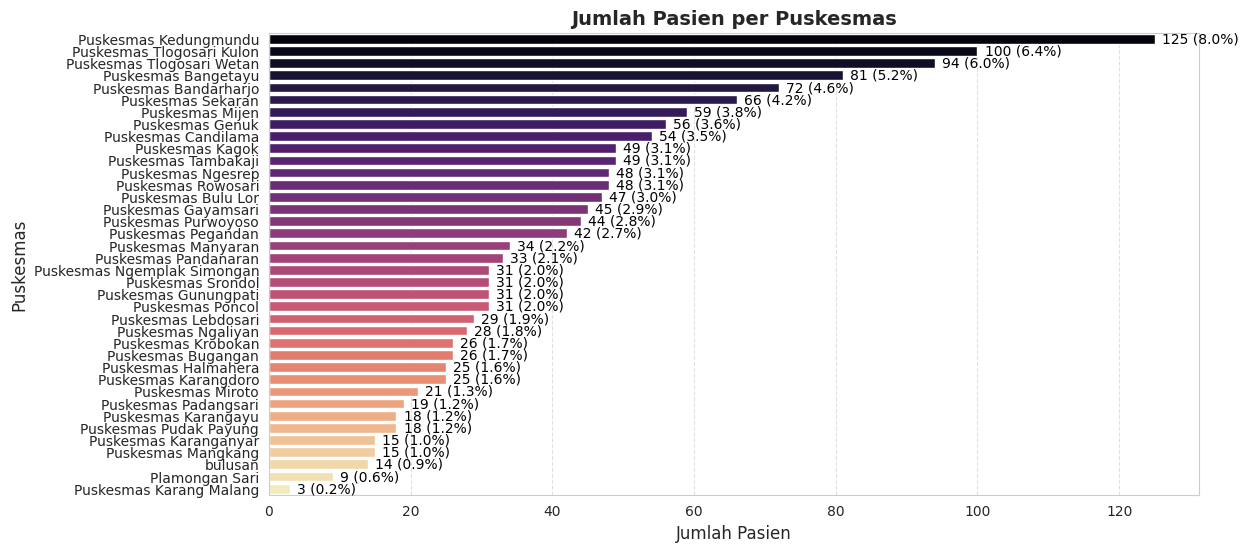

In [66]:
# Hitung jumlah pasien berdasarkan puskesmas
puskesmas_counts = df.groupby("puskesmas")["pasien"].count().reset_index()
puskesmas_counts.columns = ["puskesmas", "jumlah_pasien"]

# Hitung persentase
total_pasien = puskesmas_counts["jumlah_pasien"].sum()
puskesmas_counts["persentase"] = (puskesmas_counts["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari terbanyak
puskesmas_counts = puskesmas_counts.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(12, 6))
sns.barplot(x="jumlah_pasien", y="puskesmas", data=puskesmas_counts, palette="magma")

# Tambahkan elemen visual
plt.title("Jumlah Pasien per Puskesmas", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Puskesmas", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Grid halus di sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(puskesmas_counts["jumlah_pasien"], puskesmas_counts["persentase"])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()

<ipython-input-67-cb685818b430>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="gender", data=gender_counts, palette="viridis")


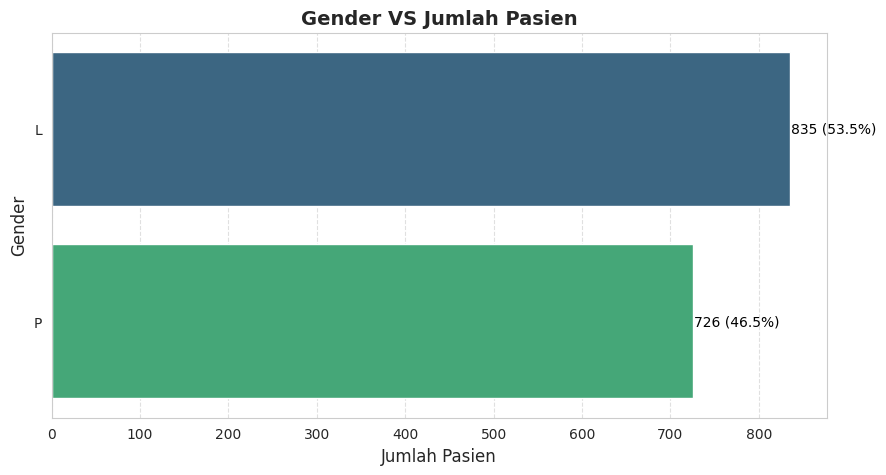

In [67]:
# Hitung jumlah pasien berdasarkan gender
gender_counts = df.groupby("gender")["pasien"].count().reset_index()
gender_counts.columns = ["gender", "jumlah_pasien"]

# Hitung persentase
total_pasien = gender_counts["jumlah_pasien"].sum()
gender_counts["persentase"] = (gender_counts["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari jumlah pasien terbanyak
gender_counts = gender_counts.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="gender", data=gender_counts, palette="viridis")

# Tambahkan elemen visual
plt.title("Gender VS Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Gender", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Grid halus di sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(gender_counts["jumlah_pasien"], gender_counts["persentase"])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()

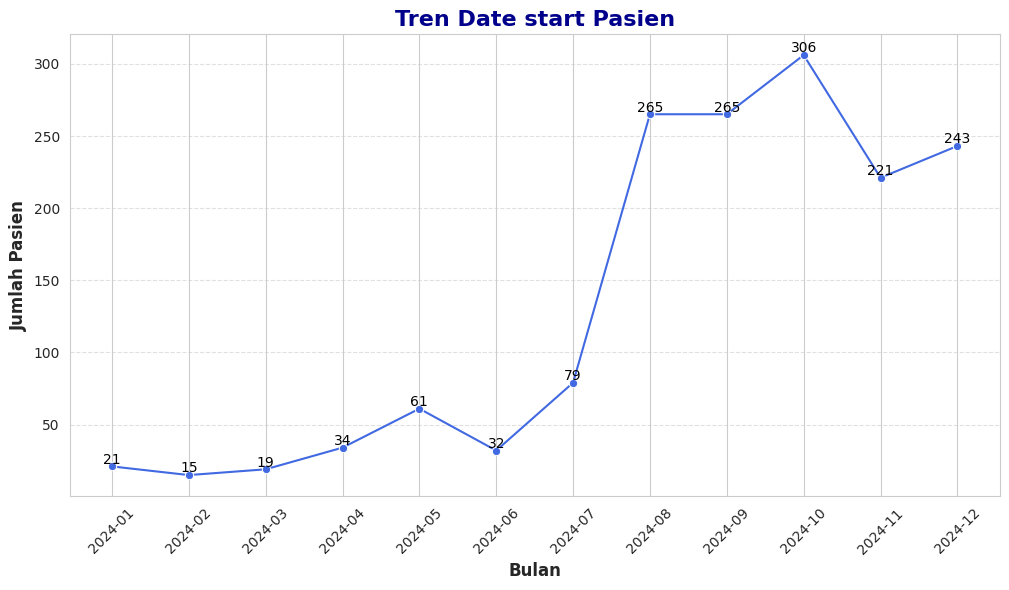

In [68]:
# Pastikan kolom date_start dalam format datetime
df["date_start"] = pd.to_datetime(df["date_start"], errors="coerce")

# Resampling data per bulan agar lebih rapi
df["year_month"] = df["date_start"].dt.to_period("M")  # Ambil format YYYY-MM
date_counts = df.groupby("year_month")["pasien"].count().reset_index()
date_counts["year_month"] = date_counts["year_month"].astype(str)  # Konversi ke string untuk sumbu X

# Buat figure
plt.figure(figsize=(12, 6))

# Plot menggunakan seaborn dengan style yang lebih menarik
sns.lineplot(x="year_month", y="pasien", data=date_counts, marker="o", linestyle="-", color="royalblue")

# elemen visual
plt.title("Tren Date start Pasien", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Bulan", fontsize=12, fontweight="bold")
plt.ylabel("Jumlah Pasien", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)  # Memiringkan label tanggal agar mudah dibaca
plt.grid(axis="y", linestyle="--", alpha=0.6)

#Tambahkan anotasi jumlah pasien pada tiap titik
for index, row in date_counts.iterrows():
    plt.text(row["year_month"], row["pasien"] + 2, f"{row['pasien']}", ha="center", fontsize=10, color="black")

plt.show()


<ipython-input-69-e5bd1fa42466>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="pekerjaan", data=data, palette="viridis")


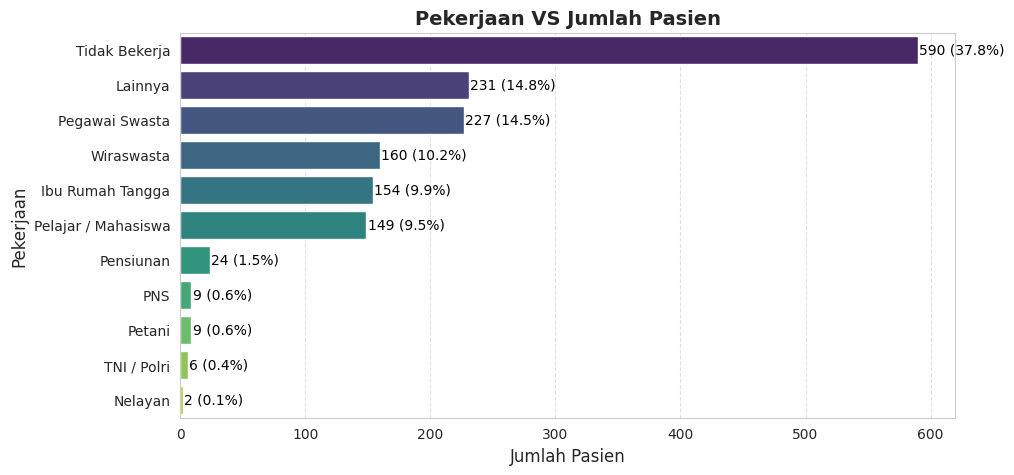

In [69]:
# Hitung jumlah pasien berdasarkan pekerjaan
data = df.groupby("pekerjaan")["pasien"].count().reset_index()
data.columns = ["pekerjaan", "jumlah_pasien"]

# Hitung persentase
total_pasien = data["jumlah_pasien"].sum()
data["persentase"] = (data["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari jumlah pasien terbanyak
data = data.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="pekerjaan", data=data, palette="viridis")

# Tambahkan elemen visual
plt.title("Pekerjaan VS Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Pekerjaan", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(data["jumlah_pasien"], data["persentase"])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()


<ipython-input-70-ea2f129659a5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="lantai", data=data, palette="viridis")


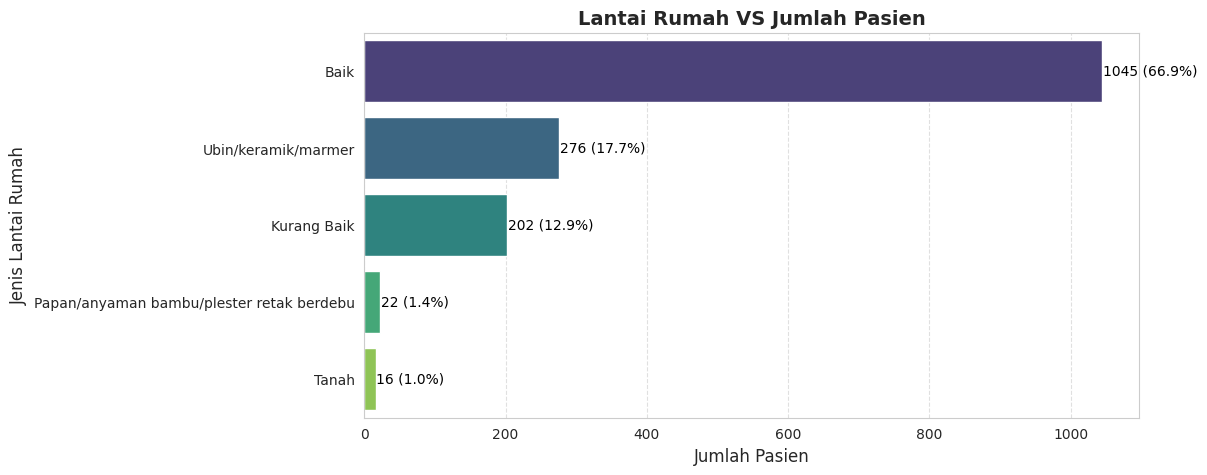

In [70]:
# Hitung jumlah pasien berdasarkan jenis lantai rumah
data = df.groupby("lantai")["pasien"].count().reset_index()
data.columns = ["lantai", "jumlah_pasien"]

# Hitung persentase
total_pasien = data["jumlah_pasien"].sum()
data["persentase"] = (data["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari jumlah pasien terbanyak
data = data.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="lantai", data=data, palette="viridis")

# Tambahkan elemen visual
plt.title("Lantai Rumah VS Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Jenis Lantai Rumah", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Grid halus di sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(data["jumlah_pasien"], data["persentase"])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()


<ipython-input-71-aa1ad98952bf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="jumlah_pasien", y="langit_langit", palette="mako")


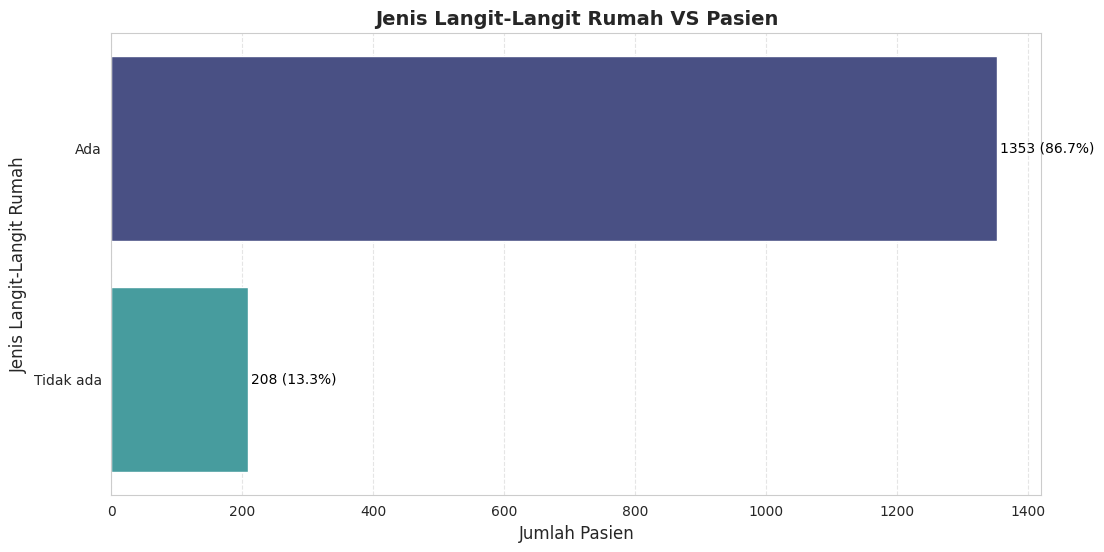

In [71]:
# Hitung jumlah pasien berdasarkan jenis langit-langit rumah
data = df.groupby("langit_langit")["pasien"].count().reset_index()
data.columns = ["langit_langit", "jumlah_pasien"]

# Hitung persentase
total_pasien = data["jumlah_pasien"].sum()
data["persentase"] = (data["jumlah_pasien"] / total_pasien) * 100

# Urutkan berdasarkan jumlah pasien terbanyak
data = data.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="jumlah_pasien", y="langit_langit", palette="mako")

# Tambahkan elemen visual
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Jenis Langit-Langit Rumah", fontsize=12)
plt.title("Jenis Langit-Langit Rumah VS Pasien", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5)  # Grid halus untuk sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(data["jumlah_pasien"], data["persentase"])):
    plt.text(value + 5, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()


<ipython-input-72-be1183869ce0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="perilaku_merokok", y="jumlah_pasien", data=df_grouped, palette="magma")


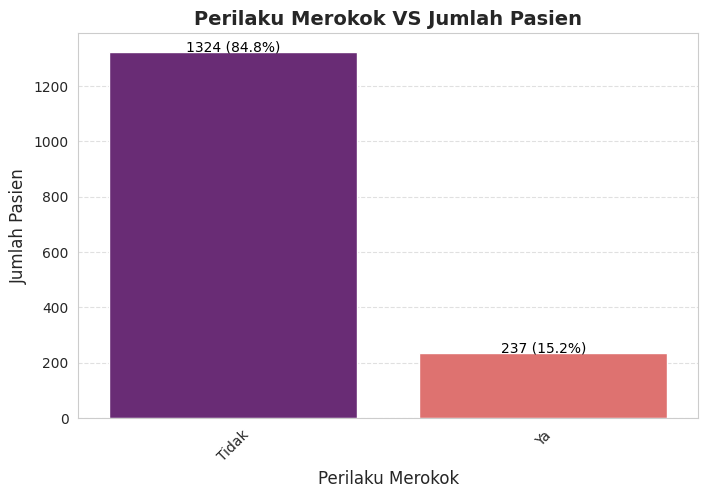

In [72]:
# Hitung jumlah pasien berdasarkan perilaku merokok
df_grouped = df.groupby("perilaku_merokok")["pasien"].count().reset_index()
df_grouped.columns = ["perilaku_merokok", "jumlah_pasien"]

# Hitung persentase
total_pasien = df_grouped["jumlah_pasien"].sum()
df_grouped["persentase"] = (df_grouped["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari jumlah pasien terbanyak
df_grouped = df_grouped.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(8, 5))
sns.barplot(x="perilaku_merokok", y="jumlah_pasien", data=df_grouped, palette="magma")

# Tambahkan elemen visual
plt.title("Perilaku Merokok VS Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Perilaku Merokok", fontsize=12)
plt.ylabel("Jumlah Pasien", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)  # Grid halus di sumbu Y

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(df_grouped["jumlah_pasien"], df_grouped["persentase"])):
    plt.text(index, value + 1, f"{value} ({percent:.1f}%)", ha='center', fontsize=10, color="black")

plt.show()

<ipython-input-73-6eedc1bdb5ed>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x="anggota_keluarga_merokok", y="jumlah_pasien", palette="coolwarm")


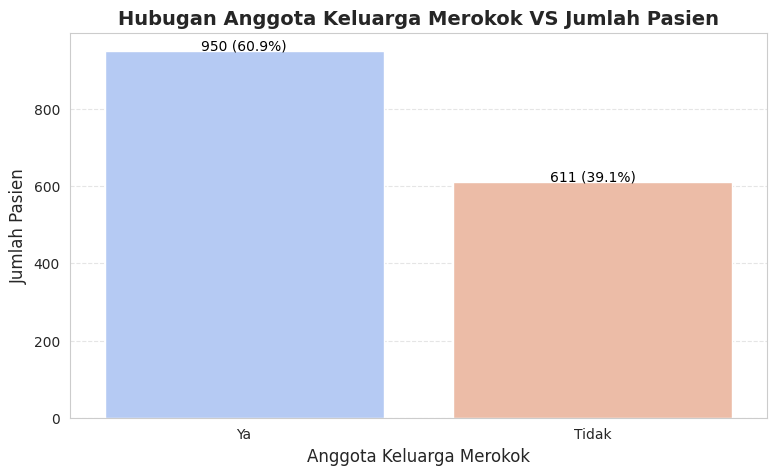

In [73]:
# Hitung jumlah pasien berdasarkan anggota keluarga yang merokok
df_grouped = df.groupby("anggota_keluarga_merokok")["pasien"].count().reset_index()
df_grouped.columns = ["anggota_keluarga_merokok", "jumlah_pasien"]

# Hitung persentase
total_pasien = df_grouped["jumlah_pasien"].sum()
df_grouped["persentase"] = (df_grouped["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari jumlah pasien terbanyak
df_grouped = df_grouped.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(9, 5))
sns.barplot(data=df_grouped, x="anggota_keluarga_merokok", y="jumlah_pasien", palette="coolwarm")

# Tambahkan elemen visual
plt.xlabel("Anggota Keluarga Merokok", fontsize=12)
plt.ylabel("Jumlah Pasien", fontsize=12)
plt.title("Hubugan Anggota Keluarga Merokok VS Jumlah Pasien", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)  # Grid halus di sumbu Y

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(df_grouped["jumlah_pasien"], df_grouped["persentase"])):
    plt.text(index, value + 2, f"{value} ({percent:.1f}%)", ha='center', fontsize=10, color="black")

plt.xticks(rotation=0)  # Pastikan teks kategori tetap terbaca
plt.show()


<ipython-input-74-6dbb77c0d1ff>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=window_counts, x="membuka_jendela_kamar_tidur", y="jumlah_pasien", palette="coolwarm")


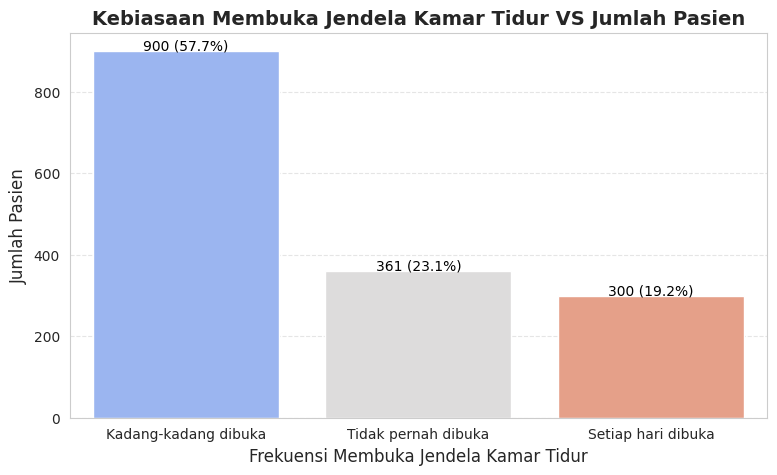

In [74]:
# Hitung jumlah pasien berdasarkan kebiasaan membuka jendela kamar tidur
window_counts = df.groupby("membuka_jendela_kamar_tidur")["pasien"].count().reset_index()
window_counts.columns = ["membuka_jendela_kamar_tidur", "jumlah_pasien"]

# Hitung persentase
total_pasien = window_counts["jumlah_pasien"].sum()
window_counts["persentase"] = (window_counts["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari jumlah pasien terbanyak
window_counts = window_counts.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(9, 5))
sns.barplot(data=window_counts, x="membuka_jendela_kamar_tidur", y="jumlah_pasien", palette="coolwarm")

# Tambahkan elemen visual
plt.xlabel("Frekuensi Membuka Jendela Kamar Tidur", fontsize=12)
plt.ylabel("Jumlah Pasien", fontsize=12)
plt.title("Kebiasaan Membuka Jendela Kamar Tidur VS Jumlah Pasien", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)  # Grid halus di sumbu Y

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(window_counts["jumlah_pasien"], window_counts["persentase"])):
    plt.text(index, value + 2, f"{value} ({percent:.1f}%)", ha='center', fontsize=10, color="black")

plt.xticks(rotation=0)  # Pastikan teks kategori tetap terbaca
plt.show()

<ipython-input-75-ec5d1568a674>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dinding_counts, y="dinding", x="jumlah_pasien", palette="coolwarm")


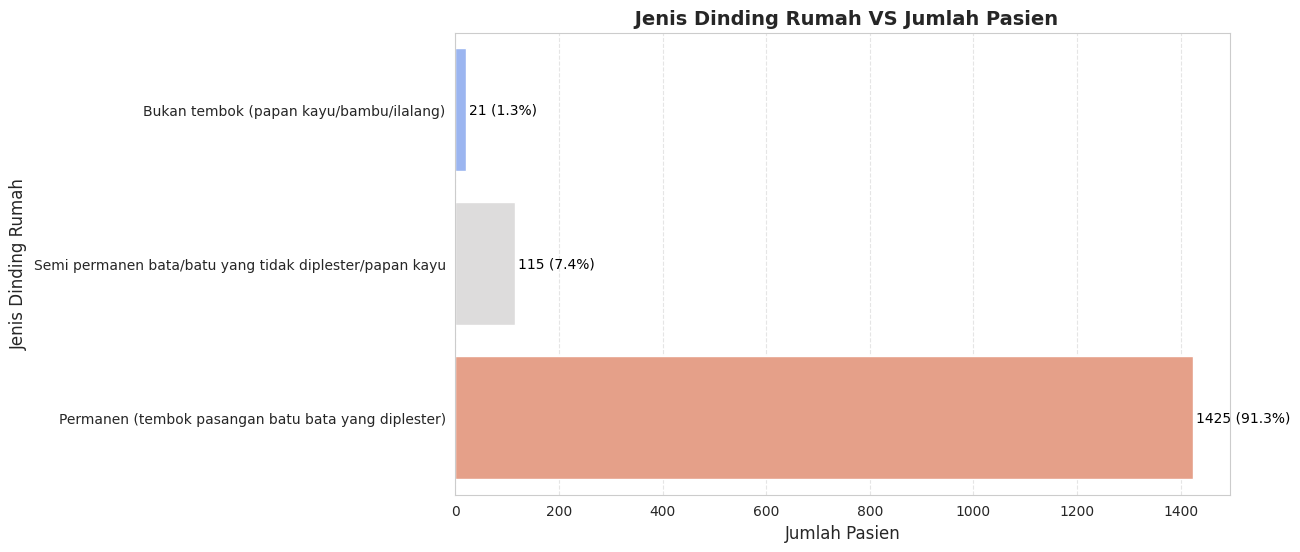

In [75]:
# Hitung jumlah pasien berdasarkan jenis dinding rumah
dinding_counts = df.groupby("dinding")["pasien"].count().reset_index()
dinding_counts.columns = ["dinding", "jumlah_pasien"]

# Hitung persentase
total_pasien = dinding_counts["jumlah_pasien"].sum()
dinding_counts["persentase"] = (dinding_counts["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari jumlah pasien terkecil ke terbesar
dinding_counts = dinding_counts.sort_values(by="jumlah_pasien", ascending=True)

# Buat figure
plt.figure(figsize=(10, 6))
sns.barplot(data=dinding_counts, y="dinding", x="jumlah_pasien", palette="coolwarm")

# Tambahkan elemen visual
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Jenis Dinding Rumah", fontsize=12)
plt.title(" Jenis Dinding Rumah VS Jumlah Pasien", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5)  # Grid halus untuk sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(dinding_counts["jumlah_pasien"], dinding_counts["persentase"])):
    plt.text(value + 5, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()

<ipython-input-76-3d4af15e19fa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventilasi_counts, y="ventilasi", x="jumlah_pasien", palette="magma")


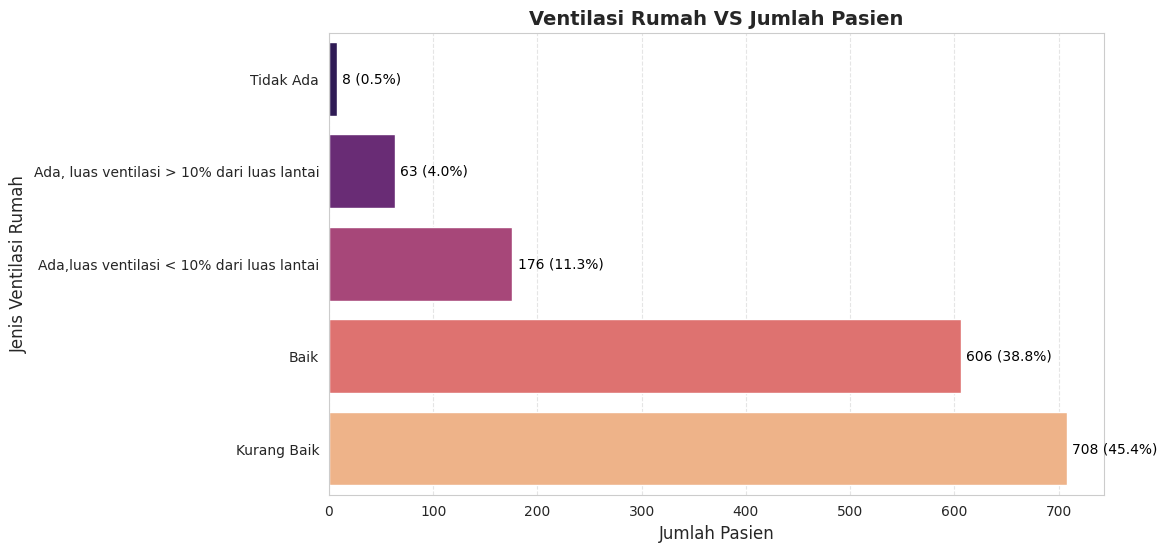

In [76]:
# Hitung jumlah pasien berdasarkan jenis ventilasi
ventilasi_counts = df.groupby("ventilasi")["pasien"].count().reset_index()
ventilasi_counts.columns = ["ventilasi", "jumlah_pasien"]

# Hitung persentase
total_pasien = ventilasi_counts["jumlah_pasien"].sum()
ventilasi_counts["persentase"] = (ventilasi_counts["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari terkecil ke terbesar
ventilasi_counts = ventilasi_counts.sort_values(by="jumlah_pasien", ascending=True)

# Buat figure
plt.figure(figsize=(10, 6))
sns.barplot(data=ventilasi_counts, y="ventilasi", x="jumlah_pasien", palette="magma")

# Tambahkan elemen visual
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Jenis Ventilasi Rumah", fontsize=12)
plt.title("Ventilasi Rumah VS Jumlah Pasien", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5)  # Grid halus untuk sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(ventilasi_counts["jumlah_pasien"], ventilasi_counts["persentase"])):
    plt.text(value + 5, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()

<ipython-input-77-e81d3f81470a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="lubang_asap_dapur", data=asap_counts, palette="viridis")


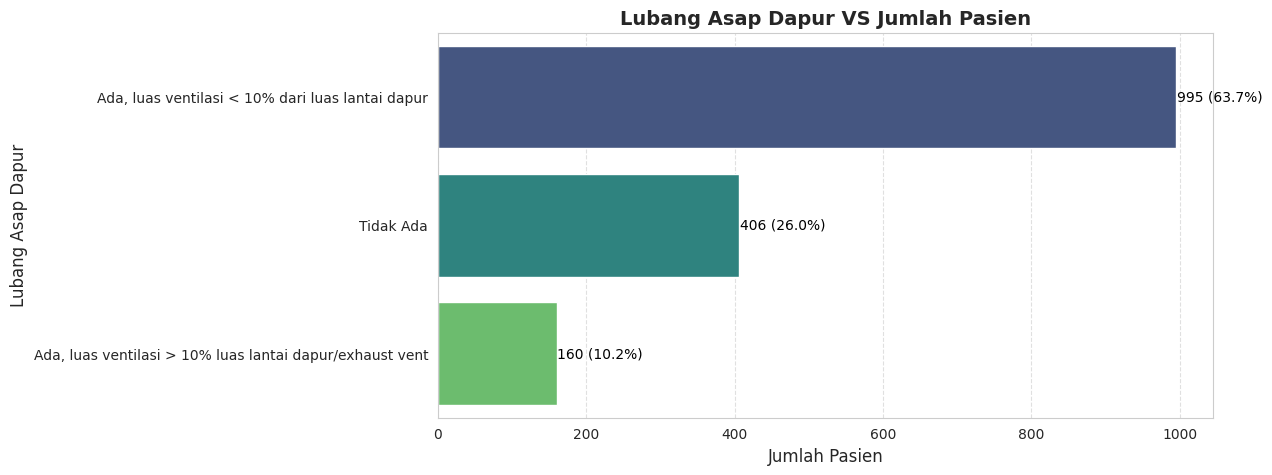

In [77]:
# Hitung jumlah pasien berdasarkan lubang asap dapur
asap_counts = df.groupby("lubang_asap_dapur")["pasien"].count().reset_index()
asap_counts.columns = ["lubang_asap_dapur", "jumlah_pasien"]

# Hitung persentase
total_pasien = asap_counts["jumlah_pasien"].sum()
asap_counts["persentase"] = (asap_counts["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari terbanyak
asap_counts = asap_counts.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="lubang_asap_dapur", data=asap_counts, palette="viridis")

# Tambahkan elemen visual
plt.title("Lubang Asap Dapur VS Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Lubang Asap Dapur", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Grid halus di sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(asap_counts["jumlah_pasien"], asap_counts["persentase"])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()

<ipython-input-78-6a358d331de6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="pencahayaan", data=pencahayaan_counts, palette="mako")


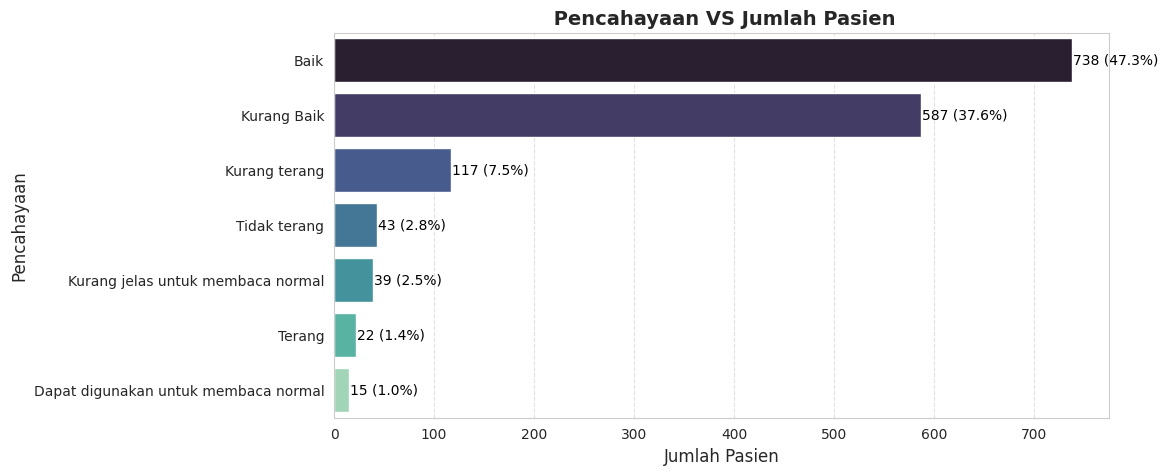

In [78]:
# Hitung jumlah pasien berdasarkan pencahayaan
pencahayaan_counts = df.groupby("pencahayaan")["pasien"].count().reset_index()
pencahayaan_counts.columns = ["pencahayaan", "jumlah_pasien"]

# Hitung persentase
total_pasien = pencahayaan_counts["jumlah_pasien"].sum()
pencahayaan_counts["persentase"] = (pencahayaan_counts["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari terbanyak
pencahayaan_counts = pencahayaan_counts.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="pencahayaan", data=pencahayaan_counts, palette="mako")

# Tambahkan elemen visual
plt.title(" Pencahayaan VS Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Pencahayaan", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Grid halus di sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(pencahayaan_counts["jumlah_pasien"], pencahayaan_counts["persentase"])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()

<ipython-input-79-4a3e30d22997>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="sarana_air_bersih", data=air_counts, palette="crest")


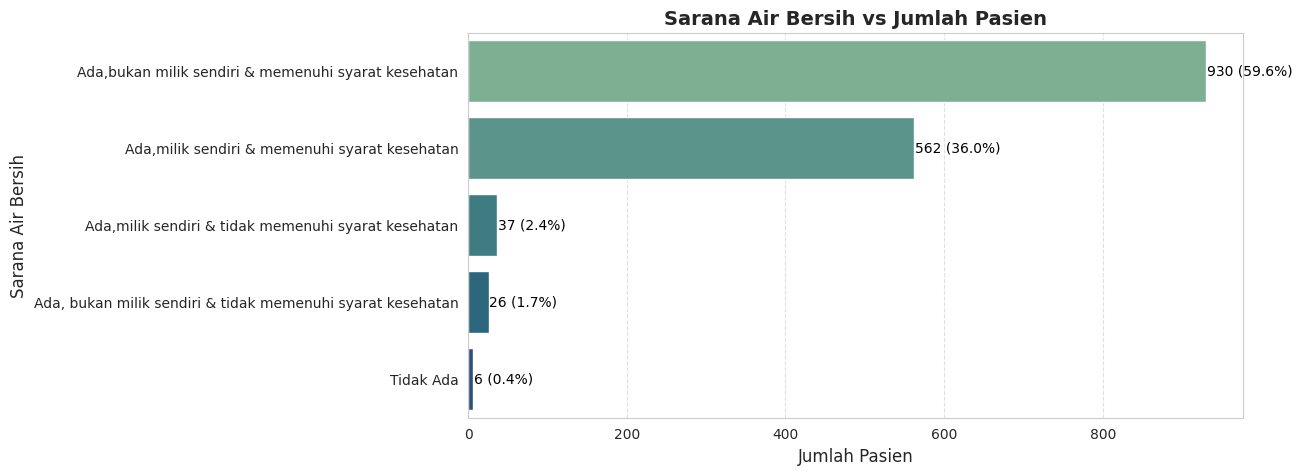

In [79]:
# Hitung jumlah pasien berdasarkan sarana air bersih
air_counts = df.groupby("sarana_air_bersih")["pasien"].count().reset_index()
air_counts.columns = ["sarana_air_bersih", "jumlah_pasien"]

# Hitung persentase
total_pasien = air_counts["jumlah_pasien"].sum()
air_counts["persentase"] = (air_counts["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari terbanyak
air_counts = air_counts.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="sarana_air_bersih", data=air_counts, palette="crest")

# Tambahkan elemen visual
plt.title("Sarana Air Bersih vs Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Sarana Air Bersih", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(air_counts["jumlah_pasien"], air_counts["persentase"])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()

<ipython-input-80-b27ad8c8c4d4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="jamban", data=jamban_counts, palette="magma")


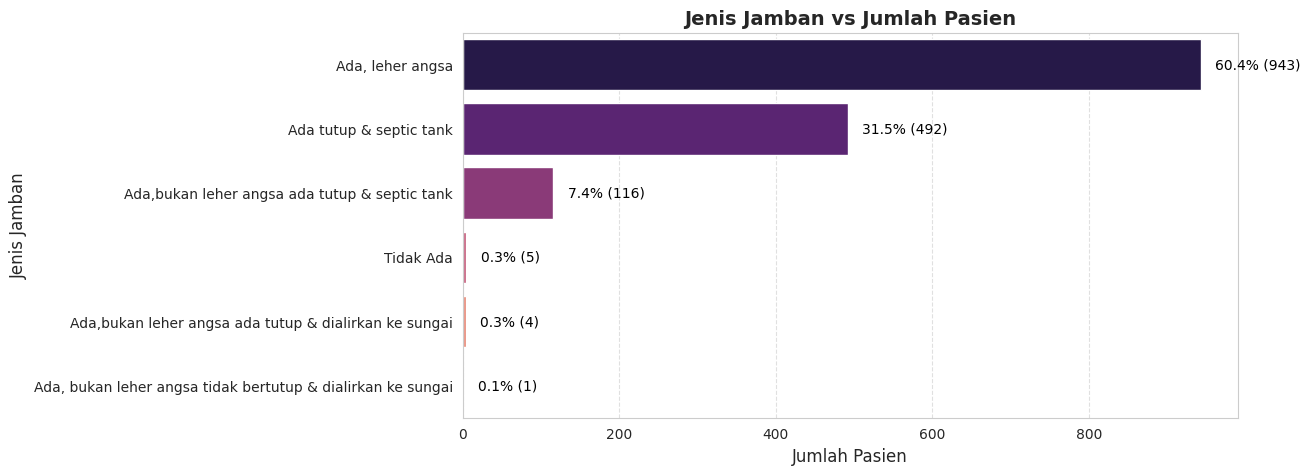

In [80]:
# Hitung jumlah pasien berdasarkan jenis jamban
jamban_counts = df.groupby("jamban")["pasien"].count().reset_index()
jamban_counts.columns = ["jamban", "jumlah_pasien"]

# Hitung persentase
total_pasien = jamban_counts["jumlah_pasien"].sum()
jamban_counts["persentase"] = (jamban_counts["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari terbanyak
jamban_counts = jamban_counts.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="jamban", data=jamban_counts, palette="magma")

# Tambahkan elemen visual
plt.title("Jenis Jamban vs Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Jenis Jamban", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(jamban_counts["jumlah_pasien"], jamban_counts["persentase"])):
    plt.text(value + max(jamban_counts["jumlah_pasien"]) * 0.02, index,
             f"{percent:.1f}% ({value})", va='center', fontsize=10, color="black")

plt.show()


<ipython-input-81-dcd132f4b5cc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="sarana_pembuangan_air_limbah", data=limbah_counts, palette="flare")


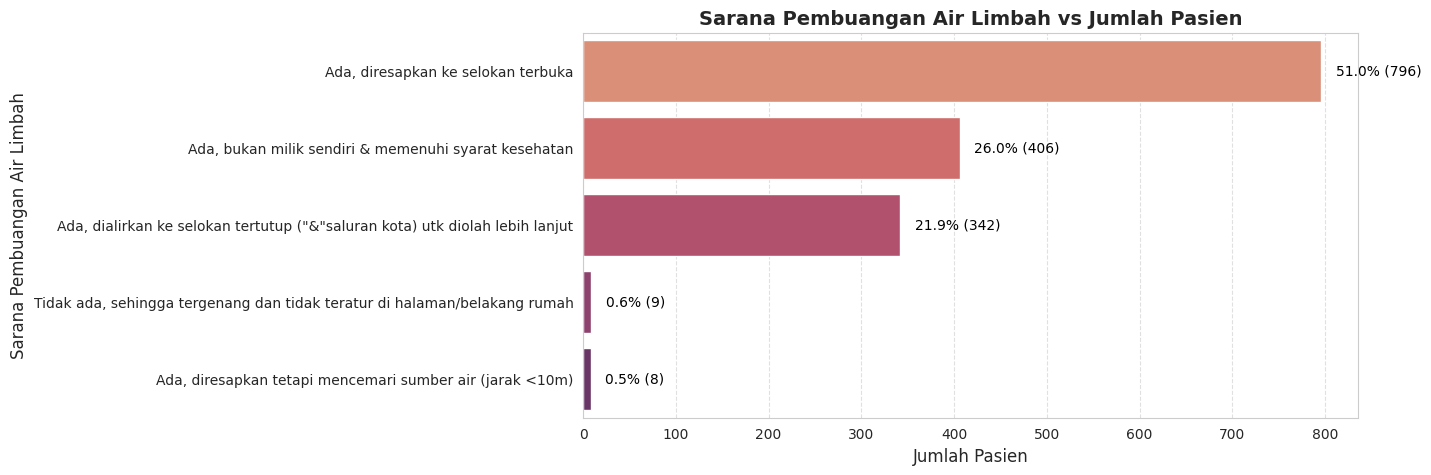

In [81]:
# Hitung jumlah pasien berdasarkan sarana pembuangan air limbah
limbah_counts = df.groupby("sarana_pembuangan_air_limbah")["pasien"].count().reset_index()
limbah_counts.columns = ["sarana_pembuangan_air_limbah", "jumlah_pasien"]

# Hitung persentase
total_pasien = limbah_counts["jumlah_pasien"].sum()
limbah_counts["persentase"] = (limbah_counts["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari terbanyak
limbah_counts = limbah_counts.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="sarana_pembuangan_air_limbah", data=limbah_counts, palette="flare")

# Tambahkan elemen visual
plt.title("Sarana Pembuangan Air Limbah vs Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Sarana Pembuangan Air Limbah", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(limbah_counts["jumlah_pasien"], limbah_counts["persentase"])):
    plt.text(value + max(limbah_counts["jumlah_pasien"]) * 0.02, index,
             f"{percent:.1f}% ({value})", va='center', fontsize=10, color="black")

plt.show()



<ipython-input-82-4b03c4ac8e56>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="sampah", data=sampah_counts, palette="ch:s=.25,rot=-.25")


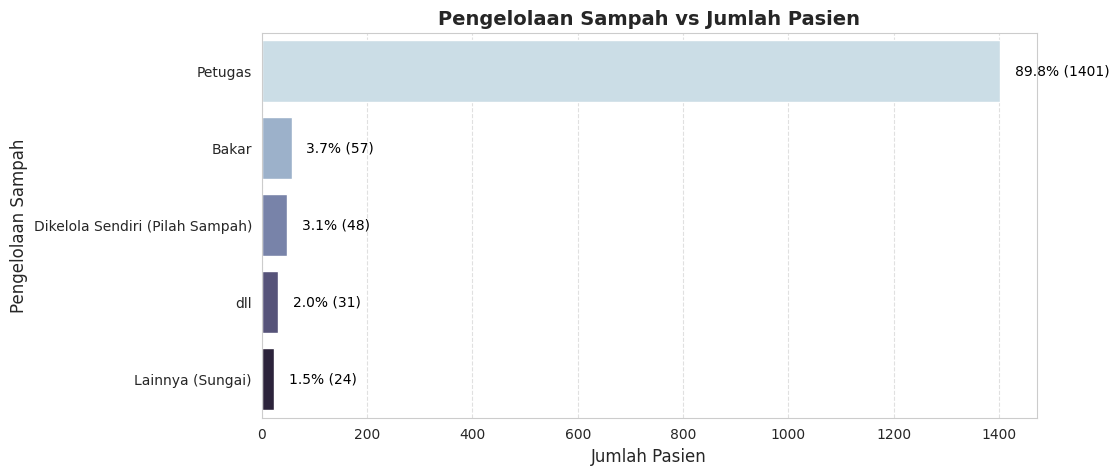

In [82]:
# Hitung jumlah pasien berdasarkan pengelolaan sampah
sampah_counts = df.groupby("sampah")["pasien"].count().reset_index()
sampah_counts.columns = ["sampah", "jumlah_pasien"]

# Hitung persentase
total_pasien = sampah_counts["jumlah_pasien"].sum()
sampah_counts["persentase"] = (sampah_counts["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari terbanyak
sampah_counts = sampah_counts.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="sampah", data=sampah_counts, palette="ch:s=.25,rot=-.25")

# Tambahkan elemen visual
plt.title("Pengelolaan Sampah vs Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Pengelolaan Sampah", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Grid halus di sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(sampah_counts["jumlah_pasien"], sampah_counts["persentase"])):
    plt.text(value + max(sampah_counts["jumlah_pasien"]) * 0.02, index,
             f"{percent:.1f}% ({value})", va='center', fontsize=10, color="black")

plt.show()


<ipython-input-83-1231d42c25b9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="membuka_jendela_kamar_tidur", data=data, palette="mako")


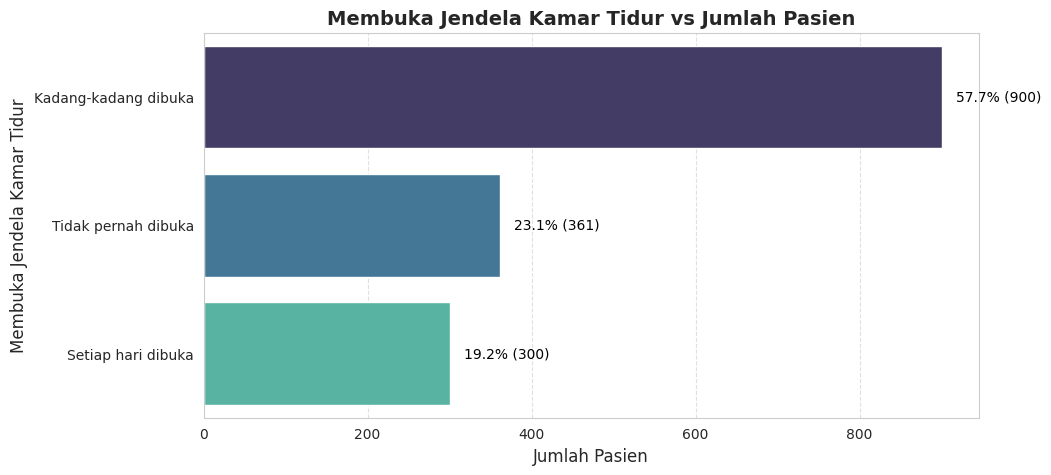

In [83]:
# Hitung jumlah pasien berdasarkan kebiasaan membuka jendela kamar tidur
data = df.groupby("membuka_jendela_kamar_tidur")["pasien"].count().reset_index()
data.columns = ["membuka_jendela_kamar_tidur", "jumlah_pasien"]

# Hitung persentase
total_pasien = data["jumlah_pasien"].sum()
data["persentase"] = (data["jumlah_pasien"] / total_pasien) * 100

# Urutkan dari terbanyak
data = data.sort_values(by="jumlah_pasien", ascending=False)

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="membuka_jendela_kamar_tidur", data=data, palette="mako")

# Tambahkan elemen visual
plt.title("Membuka Jendela Kamar Tidur vs Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Membuka Jendela Kamar Tidur", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Grid halus di sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(data["jumlah_pasien"], data["persentase"])):
    plt.text(value + max(data["jumlah_pasien"]) * 0.02, index, f"{percent:.1f}% ({value})",
             va='center', fontsize=10, color="black")

plt.show()


<ipython-input-84-8ae92b3666c5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="membersihkan_rumah", data=data, palette="Reds")


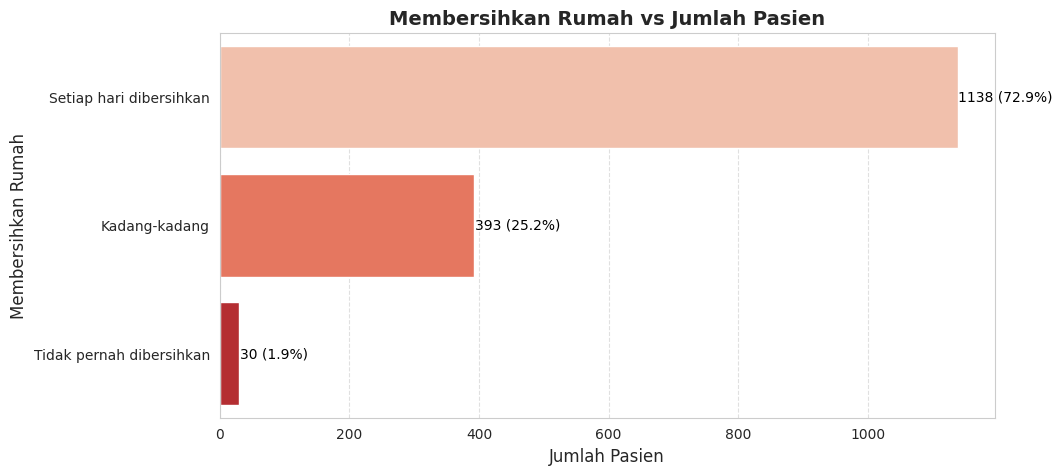

In [84]:
# Hitung jumlah pasien berdasarkan kebiasaan membersihkan rumah
data = df.groupby("membersihkan_rumah")["pasien"].count().reset_index()
data.columns = ["membersihkan_rumah", "jumlah_pasien"]
data = data.sort_values(by="jumlah_pasien", ascending=False)  # Urutkan dari terbanyak

# Hitung total pasien untuk persentase
total_pasien = data["jumlah_pasien"].sum()
data["persentase"] = (data["jumlah_pasien"] / total_pasien) * 100  # Hitung persen

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="membersihkan_rumah", data=data, palette="Reds")

# Tambahkan elemen visual
plt.title("Membersihkan Rumah vs Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Membersihkan Rumah", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Grid halus di sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(data["jumlah_pasien"], data["persentase"])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()


<ipython-input-85-87fe491bba88>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="membuang_tinja", data=data, palette="Blues_r")


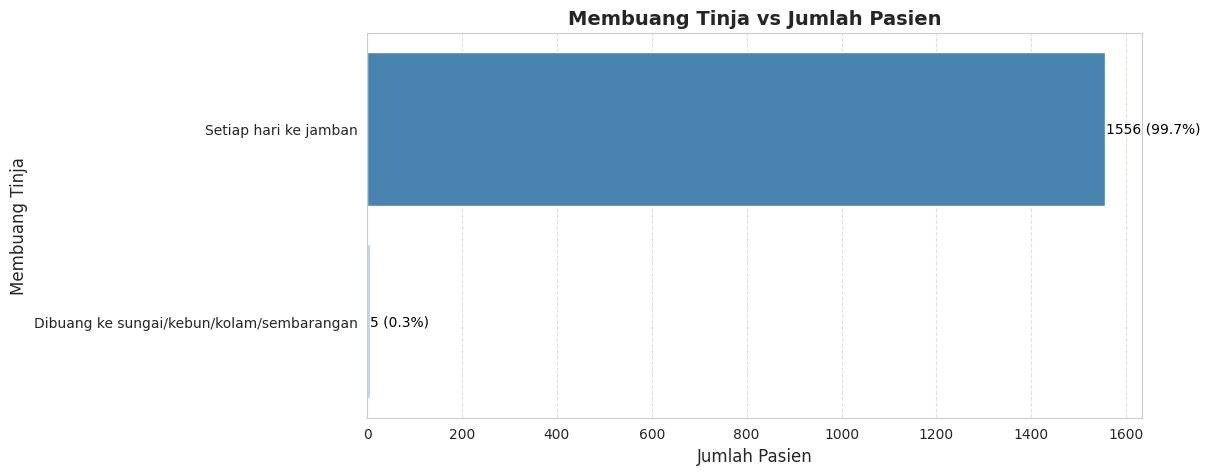

In [85]:
# Hitung jumlah pasien berdasarkan kebiasaan membuang tinja
data = df.groupby("membuang_tinja")["pasien"].count().reset_index()
data.columns = ["membuang_tinja", "jumlah_pasien"]
data = data.sort_values(by="jumlah_pasien", ascending=False)  # Urutkan dari terbanyak

# Hitung total pasien untuk persentase
total_pasien = data["jumlah_pasien"].sum()
data["persentase"] = (data["jumlah_pasien"] / total_pasien) * 100  # Hitung persen

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="membuang_tinja", data=data, palette="Blues_r")

# Tambahkan elemen visual
plt.title("Membuang Tinja vs Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Membuang Tinja", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Grid halus di sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(data["jumlah_pasien"], data["persentase"])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()


<ipython-input-86-06c57a79500b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="membuang_sampah", data=data, palette="coolwarm")


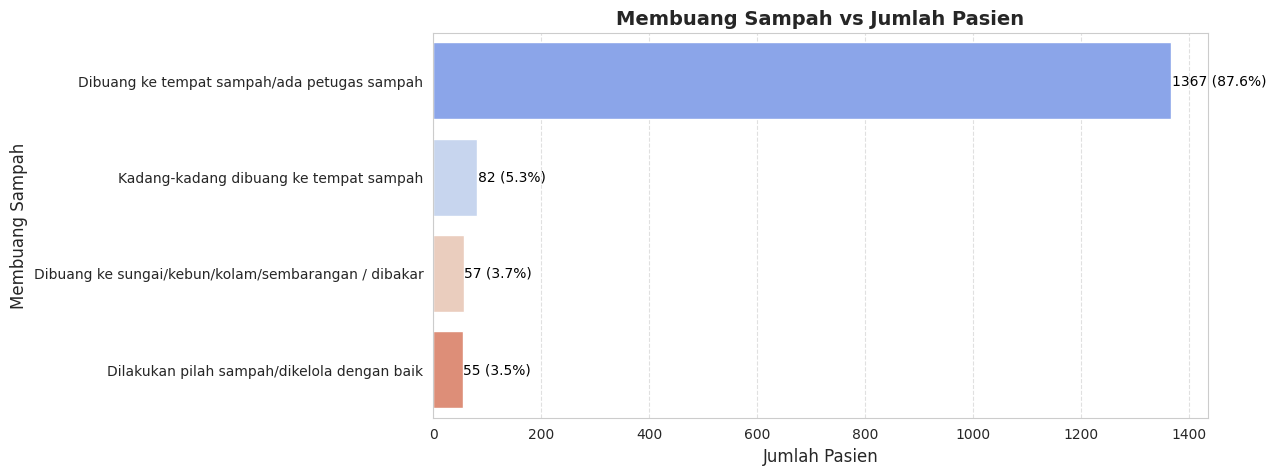

In [86]:
# Hitung jumlah pasien berdasarkan kebiasaan membuang sampah
data = df.groupby("membuang_sampah")["pasien"].count().reset_index()
data.columns = ["membuang_sampah", "jumlah_pasien"]
data = data.sort_values(by="jumlah_pasien", ascending=False)  # Urutkan dari terbanyak

# Hitung total pasien untuk persentase
total_pasien = data["jumlah_pasien"].sum()
data["persentase"] = (data["jumlah_pasien"] / total_pasien) * 100  # Hitung persen

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="membuang_sampah", data=data, palette="coolwarm")

# Tambahkan elemen visual
plt.title("Membuang Sampah vs Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Membuang Sampah", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Grid halus di sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(data["jumlah_pasien"], data["persentase"])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()


<ipython-input-87-c27e6cf8b6e2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="kebiasaan_ctps", data=data, palette="ch:s=.25,rot=-.25")


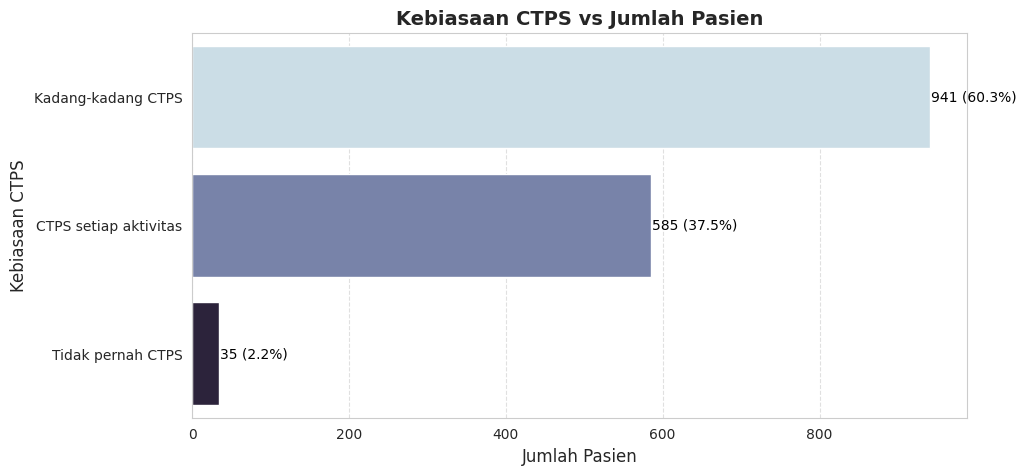

In [87]:
# Hitung jumlah pasien berdasarkan kebiasaan CTPS
data = df.groupby("kebiasaan_ctps")["pasien"].count().reset_index()
data.columns = ["kebiasaan_ctps", "jumlah_pasien"]
data = data.sort_values(by="jumlah_pasien", ascending=False)  # Urutkan dari terbanyak

# Hitung total pasien untuk persentase
total_pasien = data["jumlah_pasien"].sum()
data["persentase"] = (data["jumlah_pasien"] / total_pasien) * 100  # Hitung persen

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="kebiasaan_ctps", data=data, palette="ch:s=.25,rot=-.25")

# Tambahkan elemen visual
plt.title("Kebiasaan CTPS vs Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Kebiasaan CTPS", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Grid halus di sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(data["jumlah_pasien"], data["persentase"])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()


<ipython-input-88-d19a0e7f54af>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_pasien", y="memiliki_hewan_ternak", data=data, palette="magma_r")


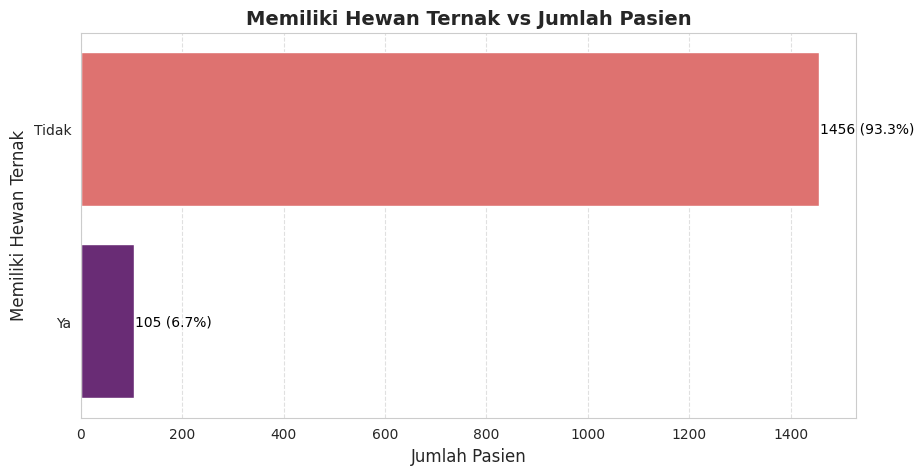

In [88]:
# Hitung jumlah pasien berdasarkan kepemilikan hewan ternak
data = df.groupby("memiliki_hewan_ternak")["pasien"].count().reset_index()
data.columns = ["memiliki_hewan_ternak", "jumlah_pasien"]
data = data.sort_values(by="jumlah_pasien", ascending=False)  # Urutkan dari terbanyak

# Hitung total pasien untuk persentase
total_pasien = data["jumlah_pasien"].sum()
data["persentase"] = (data["jumlah_pasien"] / total_pasien) * 100  # Hitung persen

# Buat figure
plt.figure(figsize=(10, 5))
sns.barplot(x="jumlah_pasien", y="memiliki_hewan_ternak", data=data, palette="magma_r")

# Tambahkan elemen visual
plt.title("Memiliki Hewan Ternak vs Jumlah Pasien", fontsize=14, fontweight="bold")
plt.xlabel("Jumlah Pasien", fontsize=12)
plt.ylabel("Memiliki Hewan Ternak", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Grid halus di sumbu X

# Menampilkan jumlah pasien dan persentase di setiap bar
for index, (value, percent) in enumerate(zip(data["jumlah_pasien"], data["persentase"])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=10, color="black")

plt.show()


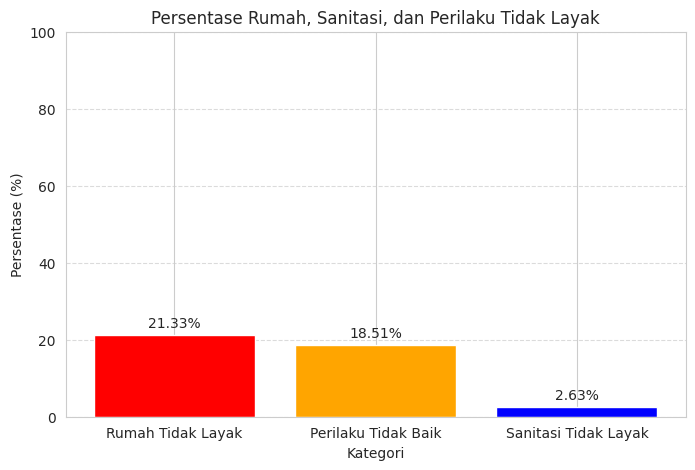

In [89]:
import matplotlib.pyplot as plt

# Data untuk grafik
kategori = ["Rumah Tidak Layak", "Sanitasi Tidak Layak", "Perilaku Tidak Baik"]
persentase = [persentase_tidak_layak_rumah, persentase_tidak_layak_sanitasi, persentase_tidak_baik_perilaku]

# Mengurutkan data dari terbesar ke terkecil
sorted_indices = sorted(range(len(persentase)), key=lambda i: persentase[i], reverse=True)
kategori = [kategori[i] for i in sorted_indices]
persentase = [persentase[i] for i in sorted_indices]

# Membuat bar chart
plt.figure(figsize=(8, 5))
plt.bar(kategori, persentase, color=['red', 'orange', 'blue'])

# Menambahkan label
plt.xlabel("Kategori")
plt.ylabel("Persentase (%)")
plt.title("Persentase Rumah, Sanitasi, dan Perilaku Tidak Layak")
plt.ylim(0, 100)  # Batas sumbu Y dari 0 hingga 100%
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan nilai di atas batang
for i, v in enumerate(persentase):
    plt.text(i, v + 2, f"{v:.2f}%", ha="center", fontsize=10)

# Menampilkan grafik
plt.show()


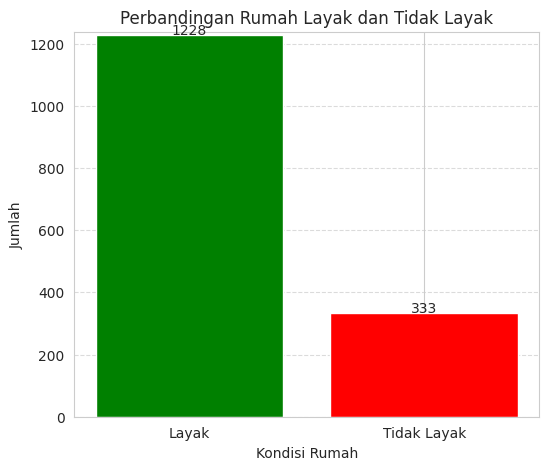

In [90]:
import matplotlib.pyplot as plt

# Menghitung jumlah rumah "Layak" dan "Tidak Layak"
jumlah_rumah_layak = df_rumah[df_rumah["Label"] == "Layak"].shape[0]
jumlah_rumah_tidak_layak = df_rumah[df_rumah["Label"] == "Tidak Layak"].shape[0]

# Data untuk grafik
kategori = ["Layak", "Tidak Layak"]
jumlah = [jumlah_rumah_layak, jumlah_rumah_tidak_layak]

# Membuat bar chart
plt.figure(figsize=(6, 5))
plt.bar(kategori, jumlah, color=['green', 'red'])

# Menambahkan label
plt.xlabel("Kondisi Rumah")
plt.ylabel("Jumlah")
plt.title("Perbandingan Rumah Layak dan Tidak Layak")
plt.ylim(0, max(jumlah) + 10)  # Menyesuaikan skala Y agar lebih jelas
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan nilai di atas batang
for i, v in enumerate(jumlah):
    plt.text(i, v + 2, str(v), ha="center", fontsize=10)

# Menampilkan grafik
plt.show()


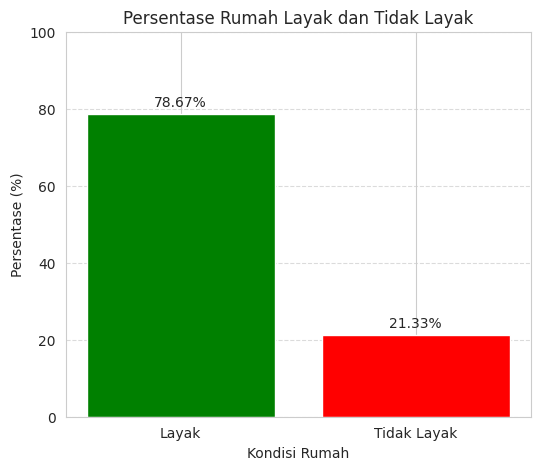

In [91]:
import matplotlib.pyplot as plt

# Menghitung jumlah rumah Layak dan Tidak Layak
persentase_layak_rumah = 100 - persentase_tidak_layak_rumah  # Sisanya adalah "Layak"

# Data untuk grafik
kategori = ["Layak", "Tidak Layak"]
persentase = [persentase_layak_rumah, persentase_tidak_layak_rumah]

# Membuat bar chart
plt.figure(figsize=(6, 5))
plt.bar(kategori, persentase, color=['green', 'red'])

# Menambahkan label
plt.xlabel("Kondisi Rumah")
plt.ylabel("Persentase (%)")
plt.title("Persentase Rumah Layak dan Tidak Layak")
plt.ylim(0, 100)  # Persentase selalu dari 0 sampai 100
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan nilai di atas batang
for i, v in enumerate(persentase):
    plt.text(i, v + 2, f"{v:.2f}%", ha="center", fontsize=10)

# Menampilkan grafik
plt.show()


In [92]:
# Menghitung persentase "Layak" sebagai pelengkap dari "Tidak Layak"
persentase_layak_rumah = 100 - persentase_tidak_layak_rumah
persentase_layak_sanitasi = 100 - persentase_tidak_layak_sanitasi
persentase_baik_perilaku = 100 - persentase_tidak_baik_perilaku


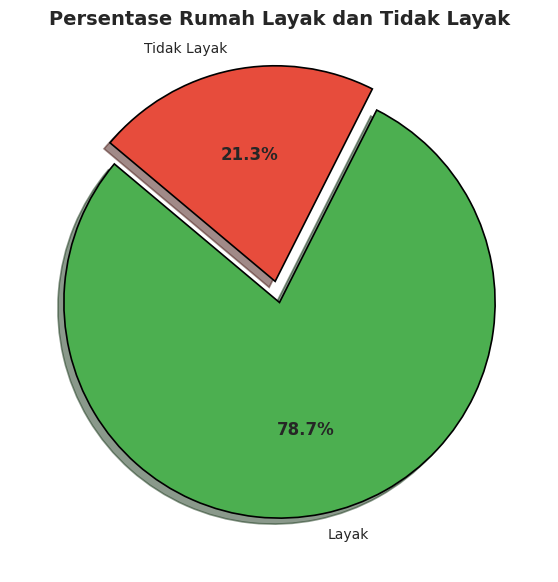

In [93]:
import matplotlib.pyplot as plt

# Data untuk pie chart
labels = ["Layak", "Tidak Layak"]
sizes = [persentase_layak_rumah, persentase_tidak_layak_rumah]
colors = ['#4CAF50', '#E74C3C']  # Hijau untuk Layak, Merah untuk Tidak Layak
explode = (0, 0.1)  # Memisahkan bagian "Tidak Layak" agar lebih menonjol

# Membuat pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140,
    explode=explode, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
)

# Memperbesar teks persentase
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_weight("bold")

# Menambahkan judul
plt.title("Persentase Rumah Layak dan Tidak Layak", fontsize=14, fontweight="bold")

# Menampilkan grafik
plt.show()


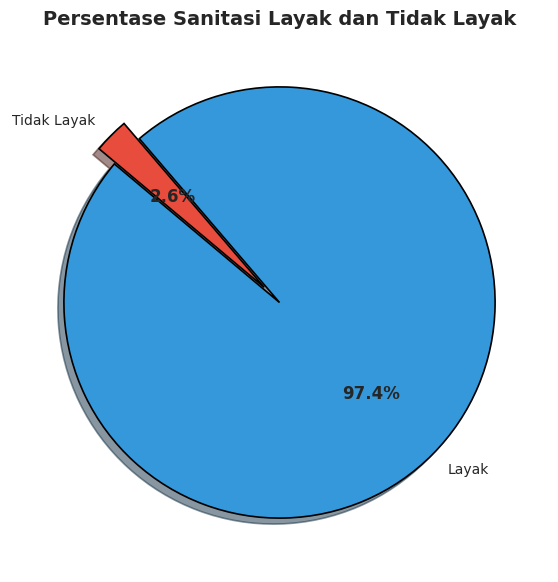

In [94]:
import matplotlib.pyplot as plt

# Data untuk pie chart sanitasi
labels_sanitasi = ["Layak", "Tidak Layak"]
sizes_sanitasi = [persentase_layak_sanitasi, persentase_tidak_layak_sanitasi]
colors_sanitasi = ['#3498DB', '#E74C3C']  # Biru untuk Layak, Merah untuk Tidak Layak
explode_sanitasi = (0, 0.1)  # Memisahkan bagian "Tidak Layak"

# Membuat pie chart sanitasi
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes_sanitasi, labels=labels_sanitasi, autopct='%1.1f%%', colors=colors_sanitasi,
    startangle=140, explode=explode_sanitasi, shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
)

# Memperbesar teks persentase
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_weight("bold")

# Menambahkan judul
plt.title("Persentase Sanitasi Layak dan Tidak Layak", fontsize=14, fontweight="bold")

# Menampilkan grafik
plt.show()


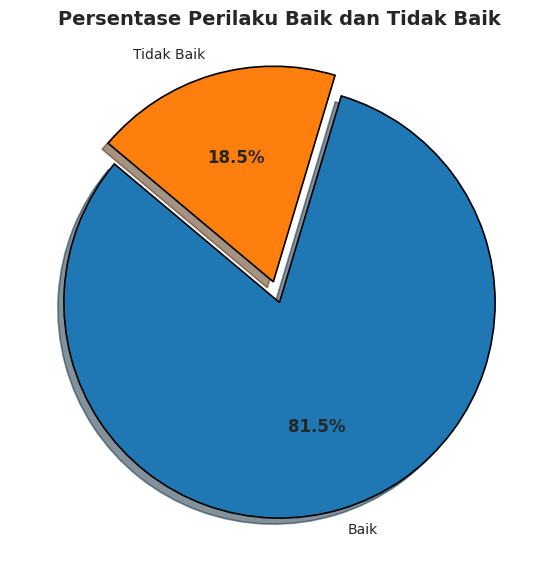

In [95]:
import matplotlib.pyplot as plt

# Menghitung persentase perilaku baik
persentase_baik_perilaku = 100 - persentase_tidak_baik_perilaku

# Data untuk pie chart perilaku
labels_perilaku = ["Baik", "Tidak Baik"]
sizes_perilaku = [persentase_baik_perilaku, persentase_tidak_baik_perilaku]
colors_perilaku = ['#1F77B4', '#FF7F0E']  # Biru untuk Baik, Oranye untuk Tidak Baik
explode_perilaku = (0, 0.1)  # Memisahkan bagian "Tidak Baik"

# Membuat pie chart perilaku
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes_perilaku, labels=labels_perilaku, autopct='%1.1f%%', colors=colors_perilaku,
    startangle=140, explode=explode_perilaku, shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
)

# Memperbesar teks persentase
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_weight("bold")

# Menambahkan judul
plt.title("Persentase Perilaku Baik dan Tidak Baik", fontsize=14, fontweight="bold")

# Menampilkan grafik
plt.show()


<ipython-input-96-c7551c27b84d>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_kategori['Jumlah'], y=df_kategori['Kategori'], palette=colors)


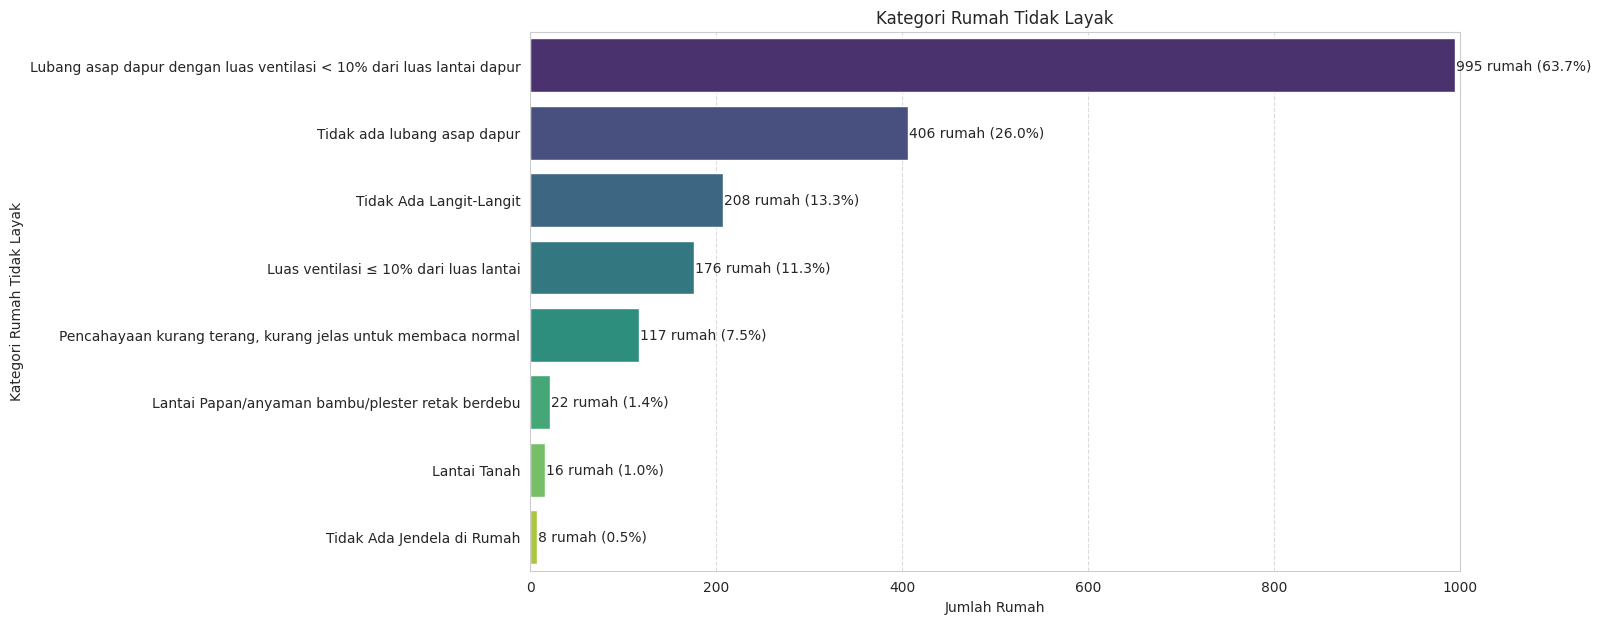

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan semua kolom tidak memiliki nilai NaN untuk menghindari error
df = df.fillna('')

# Menghitung total jumlah rumah dalam dataset
total_rumah = len(df)

# Menghitung jumlah rumah yang memiliki setiap kategori tidak layak
kategori_rumah = {
    "Luas ventilasi ≤ 10% dari luas lantai": df['ventilasi'].str.contains('luas ventilasi < 10%', case=False, na=False).sum(),
    "Pencahayaan kurang terang, kurang jelas untuk membaca normal": df['pencahayaan'].str.contains('kurang terang', case=False, na=False).sum(),
    "Lubang asap dapur dengan luas ventilasi < 10% dari luas lantai dapur": df['lubang_asap_dapur'].str.contains('luas ventilasi < 10%', case=False, na=False).sum(),
    "Tidak Ada Jendela di Rumah": df['ventilasi'].str.contains('tidak ada', case=False, na=False).sum(),
    "Tidak Ada Langit-Langit": df['langit_langit'].str.contains('tidak ada', case=False, na=False).sum(),
    "Lantai Papan/anyaman bambu/plester retak berdebu": df['lantai'].str.contains('papan|anyaman bambu|plester retak', case=False, na=False).sum(),
    "Tidak ada lubang asap dapur": df['lubang_asap_dapur'].str.contains('tidak ada', case=False, na=False).sum(),
    "Lantai Tanah": df['lantai'].str.contains('tanah', case=False, na=False).sum(),
}

# Menghapus kategori yang memiliki nilai 0
kategori_rumah = {k: v for k, v in kategori_rumah.items() if v > 0}

# Mengubah ke DataFrame untuk plotting
df_kategori = pd.DataFrame(list(kategori_rumah.items()), columns=['Kategori', 'Jumlah'])
df_kategori['Persentase'] = (df_kategori['Jumlah'] / total_rumah) * 100  # Hitung persentase
df_kategori = df_kategori.sort_values(by='Jumlah', ascending=False)

# Mengatur tema visualisasi
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Menggunakan palet warna yang lebih menarik
colors = sns.color_palette("viridis", len(df_kategori))

# Membuat bar chart horizontal
ax = sns.barplot(x=df_kategori['Jumlah'], y=df_kategori['Kategori'], palette=colors)

# Menambahkan label jumlah dan persentase
for index, (value, percent) in enumerate(zip(df_kategori['Jumlah'], df_kategori['Persentase'])):
    plt.text(value + 1, index, f"{value} rumah ({percent:.1f}%)", va='center')

# Menambahkan grid horizontal agar lebih mudah dibaca
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xlabel("Jumlah Rumah")
plt.ylabel("Kategori Rumah Tidak Layak")
plt.title("Kategori Rumah Tidak Layak")

# Mengatur batas sumbu X agar lebih rapi
plt.xlim(0, df_kategori['Jumlah'].max() + 5)

plt.show()

<ipython-input-97-4ed1699b81df>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_sanitasi['Jumlah'], y=df_sanitasi['Kategori'], palette=colors, edgecolor="black")


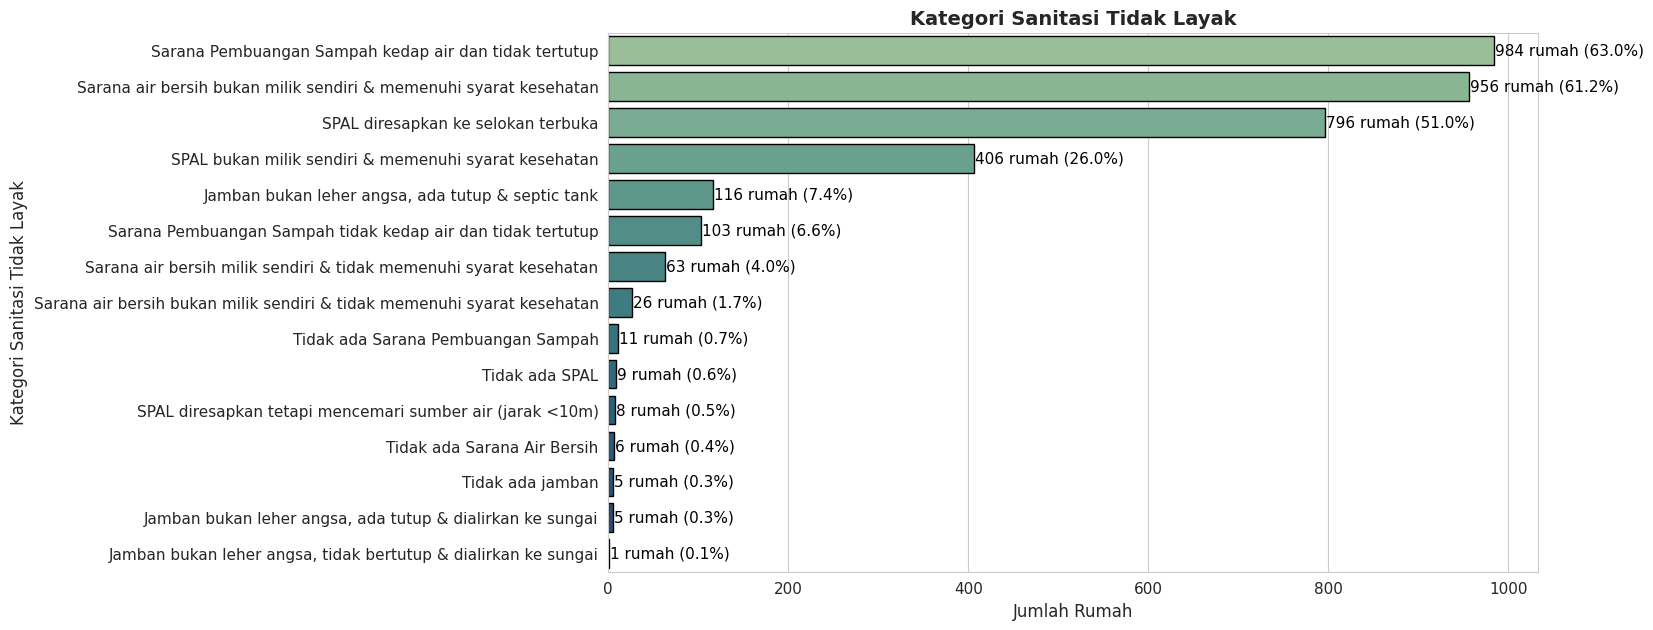

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Menghitung jumlah rumah dalam dataset
total_rumah = len(df)

# Menghitung jumlah rumah yang memiliki setiap kategori sanitasi tidak layak
kategori_sanitasi = {
    "Jamban bukan leher angsa, tidak bertutup & dialirkan ke sungai": df['jamban'].apply(lambda x: 'tidak bertutup' in str(x).lower() and 'sungai' in str(x).lower()).sum(),
    "Sarana air bersih bukan milik sendiri & tidak memenuhi syarat kesehatan": df['sarana_air_bersih'].apply(lambda x: 'bukan milik sendiri' in str(x).lower() and 'tidak memenuhi' in str(x).lower()).sum(),
    "Tidak ada Sarana Air Bersih": df['sarana_air_bersih'].apply(lambda x: 'tidak ada' in str(x).lower()).sum(),
    "SPAL diresapkan tetapi mencemari sumber air (jarak <10m)": df['sarana_pembuangan_air_limbah'].apply(lambda x: 'diresapkan' in str(x).lower() and 'mencemari' in str(x).lower()).sum(),
    "Tidak ada jamban": df['jamban'].apply(lambda x: 'tidak ada' in str(x).lower()).sum(),
    "Jamban bukan leher angsa, ada tutup & dialirkan ke sungai": df['jamban'].apply(lambda x: 'bukan leher angsa' in str(x).lower() and 'tutup' in str(x).lower() and 'sungai' in str(x).lower()).sum(),
    "Tidak ada Sarana Pembuangan Sampah": df['sarana_pembuangan_sampah'].apply(lambda x: 'tidak ada' in str(x).lower()).sum(),
    "Tidak ada SPAL": df['sarana_pembuangan_air_limbah'].apply(lambda x: 'tidak ada' in str(x).lower()).sum(),
    "Sarana air bersih milik sendiri & tidak memenuhi syarat kesehatan": df['sarana_air_bersih'].apply(lambda x: 'milik sendiri' in str(x).lower() and 'tidak memenuhi' in str(x).lower()).sum(),
    "Jamban bukan leher angsa, ada tutup & septic tank": df['jamban'].apply(lambda x: 'bukan leher angsa' in str(x).lower() and 'tutup' in str(x).lower() and 'septic tank' in str(x).lower()).sum(),
    "Sarana Pembuangan Sampah tidak kedap air dan tidak tertutup": df['sarana_pembuangan_sampah'].apply(lambda x: 'tidak kedap' in str(x).lower() and 'tidak tertutup' in str(x).lower()).sum(),
    "SPAL bukan milik sendiri & memenuhi syarat kesehatan": df['sarana_pembuangan_air_limbah'].apply(lambda x: 'bukan milik sendiri' in str(x).lower() and 'memenuhi' in str(x).lower()).sum(),
    "SPAL diresapkan ke selokan terbuka": df['sarana_pembuangan_air_limbah'].apply(lambda x: 'diresapkan' in str(x).lower() and 'selokan terbuka' in str(x).lower()).sum(),
    "Sarana air bersih bukan milik sendiri & memenuhi syarat kesehatan": df['sarana_air_bersih'].apply(lambda x: 'bukan milik sendiri' in str(x).lower() and 'memenuhi' in str(x).lower()).sum(),
    "Sarana Pembuangan Sampah kedap air dan tidak tertutup": df['sarana_pembuangan_sampah'].apply(lambda x: 'kedap air' in str(x).lower() and 'tidak tertutup' in str(x).lower()).sum()
}

# Menghapus kategori dengan nilai 0
kategori_sanitasi = {k: v for k, v in kategori_sanitasi.items() if v > 0}

# Mengubah ke DataFrame untuk plotting
df_sanitasi = pd.DataFrame(list(kategori_sanitasi.items()), columns=['Kategori', 'Jumlah'])
df_sanitasi['Persentase'] = (df_sanitasi['Jumlah'] / total_rumah) * 100  # Hitung persentase
df_sanitasi = df_sanitasi.sort_values(by='Jumlah', ascending=False)

# Membuat bar chart horizontal
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")  # Menambahkan grid
colors = sns.color_palette("crest", len(df_sanitasi))  # Menggunakan palet warna "crest"
ax = sns.barplot(x=df_sanitasi['Jumlah'], y=df_sanitasi['Kategori'], palette=colors, edgecolor="black")

# Menambahkan label jumlah dan persentase
for index, (value, percent) in enumerate(zip(df_sanitasi['Jumlah'], df_sanitasi['Persentase'])):
    plt.text(value + 1, index, f"{value} rumah ({percent:.1f}%)", va='center', fontsize=11, color='black')

# Menyesuaikan tampilan
plt.xlabel("Jumlah Rumah", fontsize=12)
plt.ylabel("Kategori Sanitasi Tidak Layak", fontsize=12)
plt.title("Kategori Sanitasi Tidak Layak", fontsize=14, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

<ipython-input-98-b24406f492a4>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_perilaku['Jumlah'], y=df_perilaku['Kategori'], palette=colors, edgecolor="black")


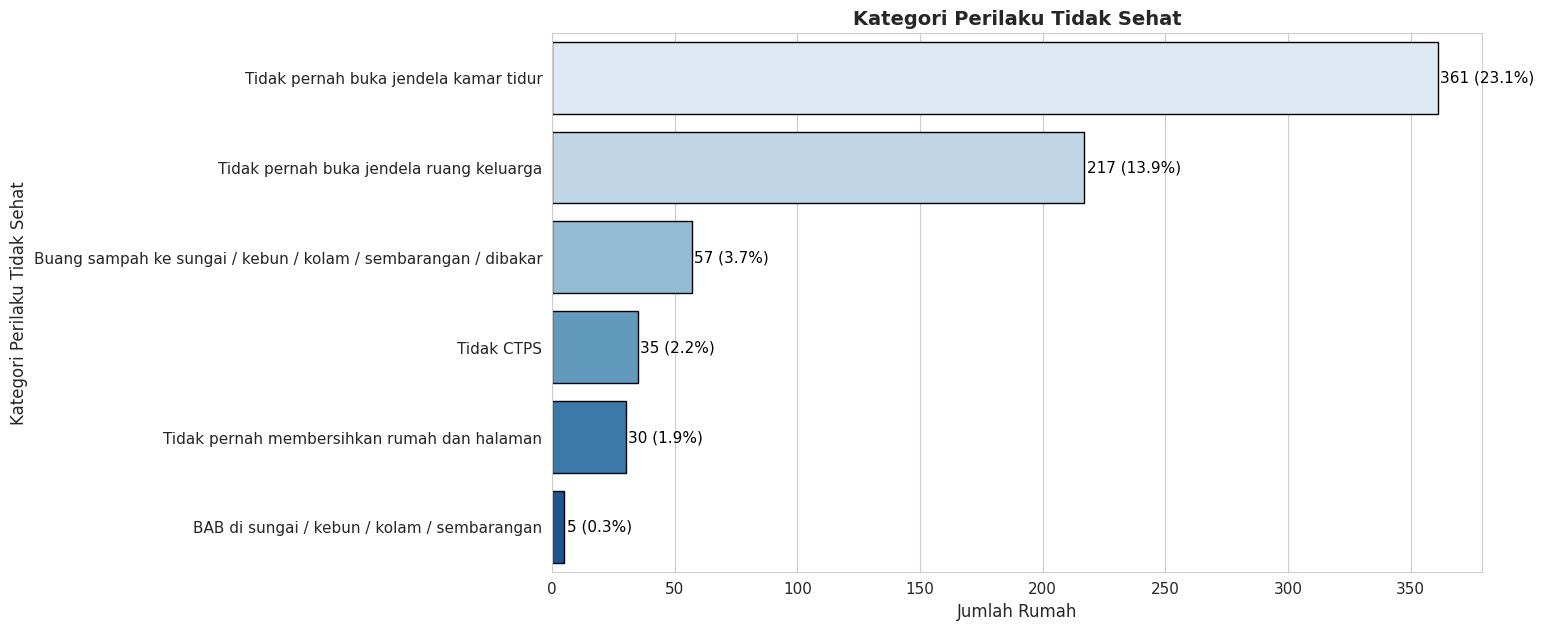

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Menghitung jumlah rumah dalam dataset
total_rumah = len(df)

# Menghitung jumlah rumah yang memiliki setiap kategori perilaku tidak sehat
kategori_perilaku = {
    "BAB di sungai / kebun / kolam / sembarangan": df['membuang_tinja'].apply(lambda x: any(word in str(x).lower() for word in ['sungai', 'kebun', 'kolam', 'sembarangan'])).sum(),
    "Tidak CTPS": df['kebiasaan_ctps'].apply(lambda x: 'tidak' in str(x).lower()).sum(),
    "Tidak pernah membersihkan rumah dan halaman": df['membersihkan_rumah'].apply(lambda x: 'tidak pernah' in str(x).lower()).sum(),
    "Buang sampah ke sungai / kebun / kolam / sembarangan / dibakar": df['membuang_sampah'].apply(lambda x: any(word in str(x).lower() for word in ['sungai', 'kebun', 'kolam', 'sembarangan', 'dibakar'])).sum(),
    "Tidak pernah buka jendela ruang keluarga": df['membuka_jendela_ruang_keluarga'].apply(lambda x: 'tidak pernah' in str(x).lower()).sum(),
    "Tidak pernah buka jendela kamar tidur": df['membuka_jendela_kamar_tidur'].apply(lambda x: 'tidak pernah' in str(x).lower()).sum(),
}

# Menghapus kategori dengan nilai 0
kategori_perilaku = {k: v for k, v in kategori_perilaku.items() if v > 0}

# Mengubah ke DataFrame untuk plotting
df_perilaku = pd.DataFrame(list(kategori_perilaku.items()), columns=['Kategori', 'Jumlah'])
df_perilaku['Persentase'] = (df_perilaku['Jumlah'] / total_rumah) * 100  # Hitung persentase
df_perilaku = df_perilaku.sort_values(by='Jumlah', ascending=False)

# Membuat bar chart horizontal
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")  # Menambahkan grid
colors = sns.color_palette("Blues", len(df_perilaku))  # Menggunakan palet warna "Blues"
ax = sns.barplot(x=df_perilaku['Jumlah'], y=df_perilaku['Kategori'], palette=colors, edgecolor="black")

# Menambahkan label jumlah dan persentase
for index, (value, percent) in enumerate(zip(df_perilaku['Jumlah'], df_perilaku['Persentase'])):
    plt.text(value + 1, index, f"{value} ({percent:.1f}%)", va='center', fontsize=11, color='black')

# Menyesuaikan tampilan
plt.xlabel("Jumlah Rumah", fontsize=12)
plt.ylabel("Kategori Perilaku Tidak Sehat", fontsize=12)
plt.title("Kategori Perilaku Tidak Sehat", fontsize=14, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()